In [1]:
# Scheduling and Multithreading
import schedule  # Used for scheduling jobs to run at specific intervals
import threading  # Used for enabling multithreading
from fpdf import FPDF  # For creating PDF reports
import imgkit  # For converting HTML files to images (PNG)
from shapely.geometry import Point  # For creating point geometries

# Data Processing and Analysis
import pandas as pd  # Used for data manipulation and analysis
import numpy as np   # Used for numerical operations and handling arrays
from scipy import stats  # Used for statistical analysis

# Machine Learning and Statistical Modeling
from sklearn.model_selection import train_test_split  # Used for splitting data into training and test sets
from sklearn.linear_model import LinearRegression  # Used for implementing a Linear Regression model
from sklearn.metrics import mean_squared_error, r2_score  # Used for evaluating model performance
from sklearn.preprocessing import StandardScaler  # Used for scaling data before modeling
from sklearn.ensemble import RandomForestRegressor  # Used for regression tasks using Random Forest
from sklearn.model_selection import GridSearchCV  # Used for hyperparameter optimization by searching over a grid of parameters
from sklearn.svm import SVR  # Support Vector Regressor (SVR) model
from sklearn.ensemble import VotingRegressor  # VotingRegressor combines different models
import joblib  # Used for saving and loading models

# Data Visualization
import matplotlib.pyplot as plt  # Used for creating static, animated, and interactive visualizations
import seaborn as sns  # Used for making statistical graphics
import plotly.express as px  # Used for creating interactive plots
import plotly.graph_objs as go
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

# Geographic Information Systems (GIS) Analysis
import geopandas as gpd  # Used for working with geospatial data
import folium  # Used for creating interactive maps

# ETL Processes and Data Integration
from sqlalchemy import create_engine  # Used for connecting to and interacting with databases

# Date and Time Handling
import datetime as dt  # Used for manipulating dates and times
import calendar  # Used for calendar-related functions

# File Path and Directory Handling
import os  # Used for interacting with the operating system and handling file paths
import glob  # Used for finding all the pathnames matching a specified pattern

# Performance Monitoring and Optimization
import time  # Used for tracking execution time of code blocks
import memory_profiler  # Used for monitoring memory usage

# JSON and CSV File Handling
import json  # Used for parsing and working with JSON data
import csv  # Used for reading and writing CSV files
from fpdf import FPDF
import os  # For file handling

# Debugging and Error Handling
import logging  # Used for tracking events that happen when the software runs
import traceback  # Used for printing detailed error information

import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress specific warnings from sklearn
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Setting up options for better readability and display of data in the notebook
pd.set_option('display.max_columns', None)  # Display all columns of dataframes
pd.set_option('display.max_rows', 100)  # Display more rows for large datasets

C:\Users\pinar\AppData\Local\Temp\ipykernel_11996\2048850402.py:30: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\pinar\AppData\Local\Temp\ipykernel_11996\2048850402.py:31: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [2]:
# Define the path to the data file
# This line specifies the location of the CSV file that contains the data.
# The file is located in the "data" directory, which is a subfolder of the main project directory.
# The file name is "BLUEFLUX_Transect_Shark_Haney_Rivers_TarponBay.csv".
data_path = 'data/BLUEFLUX_Transect_Shark_Haney_Rivers_TarponBay.csv'

# Load the data from the CSV file into a pandas DataFrame
# The pd.read_csv() function from the Pandas library is used to read the CSV file and load its content into a DataFrame.
# A DataFrame is a two-dimensional, size-mutable, and potentially heterogeneous tabular data structure with labeled axes (rows and columns).
# This step transforms the CSV data into a format that can be easily manipulated and analyzed in Python.
data = pd.read_csv(data_path)

# Display the first few rows of the data to check the content
# The head() method is used to display the first 5 rows of the DataFrame by default.
# This allows you to quickly inspect the structure of the data and verify that it has been loaded correctly.
# It's particularly useful for understanding the types of data you're working with, such as numerical values, strings, or dates.
data.head()

site season        date   time  latitude  longitude   temp  \
0               Oyster    Wet  2022-10-17  15:45  25.34187  -81.05741  28.97   
1  WhiteWater 1 (WWB1)    Wet  2022-10-17  -9999  25.30627  -81.01984  28.92   
2                 WWB2    Wet  2022-10-17  -9999  25.27462  -80.98427  28.67   
3         Tarpon Creek    Wet  2022-10-17  17:00  25.20855  -80.93024  28.29   
4             SRS Gulf    Wet  2022-10-15  13:15  25.35741  -81.13770  29.18   

     pH  specific_conductance  turbidity  HDO_con_mg_liter  HDO_sat_percent  \
0  8.04               21500.0    -9999.0              3.68             52.8   
1  8.66               14390.0    -9999.0              7.29            101.9   
2  8.56               15140.0    -9999.0              6.78             94.6   
3  8.00              208310.0    -9999.0              2.57             36.3   
4  8.18               38500.0    -9999.0              4.24             65.1   

   cdom_probe_value  alternate_cdom_probe_value     Chl  salinity      DIC  \
0           -9999.0                     -9999.0 -9999.0     12.80 -9999.00   
1           -9999.0                     -9999.0 -9999.0      8.29 -9999.00   
2           -9999.0                     -9999.0 -9999.0      8.77 -9999.00   
3           -9999.0                     -9999.0 -9999.0     12.07 -9999.00   
4           -9999.0                     -9999.0 -9999.0     24.40  2806.24   

   alkalinity      DOC  fluorescence_index  humification_index  \
0     -9999.0 -9999.00            -9999.00            -9999.00   
1     -9999.0 -9999.00            -9999.00            -9999.00   
2     -9999.0 -9999.00            -9999.00            -9999.00   
3     -9999.0 -9999.00            -9999.00            -9999.00   
4      3080.8     6.55                1.19               11.15   

   fluorescence_index_new  manta_probe1  manta_probe2  freshness  \
0                 -9999.0      -9999.00      -9999.00   -9999.00   
1                 -9999.0      -9999.00      -9999.00   -9999.00   
2                 -9999.0      -9999.00      -9999.00   -9999.00   
3                 -9999.0      -9999.00      -9999.00   -9999.00   
4                     1.5       1386.73        524.75       0.67   

   coble_peak_b  coble_peak_t  coble_peak_a  coble_peak_m  coble_peak_c  \
0      -9999.00      -9999.00      -9999.00      -9999.00      -9999.00   
1      -9999.00      -9999.00      -9999.00      -9999.00      -9999.00   
2      -9999.00      -9999.00      -9999.00      -9999.00      -9999.00   
3      -9999.00      -9999.00      -9999.00      -9999.00      -9999.00   
4          0.18          0.18          1.47          0.78          0.58   

   uva_254  specific_uva_254  uva_412  spectral_slope_275_295  \
0 -9999.00          -9999.00 -9999.00                -9999.00   
1 -9999.00          -9999.00 -9999.00                -9999.00   
2 -9999.00          -9999.00 -9999.00                -9999.00   
3 -9999.00          -9999.00 -9999.00                -9999.00   
4    21.42              3.27     1.59                    0.02   

   spectral_slope_350_400  spectral_slope_ratio  spectral_slope_280_450  \
0                -9999.00              -9999.00                -9999.00   
1                -9999.00              -9999.00                -9999.00   
2                -9999.00              -9999.00                -9999.00   
3                -9999.00              -9999.00                -9999.00   
4                    0.02                  1.07                    0.02   

   spectral_slope_588_598  total_absorb_250_450  total_absorb_300_340  \
0                -9999.00              -9999.00              -9999.00   
1                -9999.00              -9999.00              -9999.00   
2                -9999.00              -9999.00              -9999.00   
3                -9999.00              -9999.00              -9999.00   
4                   -0.02               1418.74                314.38   

   model_comp_1  model_comp_2  model_comp_3  model_comp

In [3]:
# Check for missing values in the dataset
# The isnull() method returns a DataFrame of the same shape as the original, where each entry is True if the corresponding value is missing (NaN) and False otherwise.
# The sum() method is then used to count the number of missing values in each column.
missing_values = data.isnull().sum()

# Display the columns with missing values and their counts
# By filtering only columns with missing values, we focus on potential problem areas that need to be addressed.
print("Missing values in each column:\n", missing_values[missing_values > 0])

Missing values in each column:
 Series([], dtype: int64)


In [4]:
# Filling missing temperature values with the mean of the column
# This approach replaces missing values with the mean of the column, which is a simple but often effective method to handle missing data.
data['temp'].fillna(data['temp'].mean(), inplace=True)

# Similarly, filling other missing numerical values
# For consistency, other important numerical columns (pCO2, pCH4, pN2O) are also filled with their respective means.
data['pCO2'].fillna(data['pCO2'].mean(), inplace=True)
data['pCH4'].fillna(data['pCH4'].mean(), inplace=True)
data['pN2O'].fillna(data['pN2O'].mean(), inplace=True)

# Verify that there are no missing values left
# After filling the missing values, it's important to check again to ensure all missing data has been handled.
missing_values_after = data.isnull().sum()
print("Missing values after filling:\n", missing_values_after[missing_values_after > 0])

Missing values after filling:
 Series([], dtype: int64)


In [5]:
# Convert the date column to datetime format
# Converting the date column to datetime format allows for accurate time series analysis and date-based filtering.
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Ensuring numerical columns are in the correct format
# Converting columns to numeric ensures that they can be used in mathematical operations without errors.
# The errors='coerce' parameter converts invalid parsing to NaN.
data['temp'] = pd.to_numeric(data['temp'], errors='coerce')
data['pCO2'] = pd.to_numeric(data['pCO2'], errors='coerce')
data['pCH4'] = pd.to_numeric(data['pCH4'], errors='coerce')
data['pN2O'] = pd.to_numeric(data['pN2O'], errors='coerce')

# Verify the data types to ensure conversions were successful
# This step ensures that all columns are in the correct format for further analysis.
print("Data types after conversion:\n", data.dtypes)

Data types after conversion:
 site                                  object
season                                object
date                          datetime64[ns]
time                                  object
latitude                             float64
longitude                            float64
temp                                 float64
pH                                   float64
specific_conductance                 float64
turbidity                            float64
HDO_con_mg_liter                     float64
HDO_sat_percent                      float64
cdom_probe_value                     float64
alternate_cdom_probe_value           float64
Chl                                  float64
salinity                             float64
DIC                                  float64
alkalinity                           float64
DOC                                  float64
fluorescence_index                   float64
humification_index                   float64
fluorescence_index_new   

In [6]:
# Checking data types of each column
# The dtypes attribute returns the data type of each column in the DataFrame.
data.dtypes

# Converting columns to appropriate data types if necessary
# For example, if the date column is stored as a string, we can convert it to a datetime object.
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# You can also convert numeric columns if they are stored as strings, e.g.,
# data['temp'] = pd.to_numeric(data['temp'], errors='coerce')

In [7]:
# Review the data types again to ensure all conversions were successful
# This command helps you verify the data types of all columns in your DataFrame.
# After making conversions (e.g., converting strings to dates), it's essential to check if all columns now have the correct data type.
# It provides a quick way to ensure that numerical data is in the correct format for analysis.
data.dtypes

site                                  object
season                                object
date                          datetime64[ns]
time                                  object
latitude                             float64
longitude                            float64
temp                                 float64
pH                                   float64
specific_conductance                 float64
turbidity                            float64
HDO_con_mg_liter                     float64
HDO_sat_percent                      float64
cdom_probe_value                     float64
alternate_cdom_probe_value           float64
Chl                                  float64
salinity                             float64
DIC                                  float64
alkalinity                           float64
DOC                                  float64
fluorescence_index                   float64
humification_index                   float64
fluorescence_index_new               float64
manta_prob

In [8]:
# Display all column names and their data types
# The info() method gives a concise summary of the DataFrame, showing the total number of entries, column names, non-null counts, and data types.
# This is useful for identifying any columns with missing values (non-null counts) and understanding the overall structure of your data.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   site                        59 non-null     object        
 1   season                      59 non-null     object        
 2   date                        59 non-null     datetime64[ns]
 3   time                        59 non-null     object        
 4   latitude                    59 non-null     float64       
 5   longitude                   59 non-null     float64       
 6   temp                        59 non-null     float64       
 7   pH                          59 non-null     float64       
 8   specific_conductance        59 non-null     float64       
 9   turbidity                   59 non-null     float64       
 10  HDO_con_mg_liter            59 non-null     float64       
 11  HDO_sat_percent             59 non-null     float64       
 

In [9]:
# Generate descriptive statistics for all numerical columns
# The describe() method calculates various summary statistics for numerical columns such as mean, median, standard deviation, etc.
# It provides a quick overview of the distribution and central tendencies of your data.
data.describe()

# Additionally, you can generate statistics for categorical data (like 'site' and 'season') using:
# This command extends the describe() method to include categorical data by specifying include=['object'].
# It provides statistics like count, unique values, most frequent value (top), and frequency of the most frequent value (freq) for categorical columns.
data.describe(include=['object'])

site season   time
count         59     59     59
unique        38      2     47
top     Harney 4    Dry  -9999
freq           2     32      9

In [10]:
# Select only numerical columns from the data
# The select_dtypes() method allows you to filter the DataFrame based on data types.
# Here, we're including only numerical data types (like int and float) to focus on columns that can be used in mathematical operations, such as correlation.
# This step is necessary because correlation calculations require numerical inputs, and including non-numerical data would cause errors.
numerical_data = data.select_dtypes(include=[np.number])

In [11]:
# Generate a correlation matrix for numerical columns
# The corr() method computes pairwise correlation of numerical columns in the DataFrame.
# Correlation measures the strength and direction of the linear relationship between two variables, with values ranging from -1 to 1.
# A positive value indicates a positive correlation, while a negative value indicates an inverse relationship.
correlation_matrix = numerical_data.corr()

In [12]:
# Display the correlation matrix
# This command outputs the correlation matrix to visually inspect the relationships between numerical features.
correlation_matrix

latitude  longitude      temp        pH  \
latitude                    1.000000   0.643348 -0.018483 -0.018559   
longitude                   0.643348   1.000000 -0.045160 -0.045287   
temp                       -0.018483  -0.045160  1.000000  1.000000   
pH                         -0.018559  -0.045287  1.000000  1.000000   
specific_conductance       -0.468333  -0.213587  0.246302  0.246408   
turbidity                  -0.179620  -0.331608  0.166958  0.167291   
HDO_con_mg_liter            0.033306  -0.051194  0.886266  0.886266   
HDO_sat_percent             0.031441  -0.052625  0.886286  0.886287   
cdom_probe_value           -0.178226  -0.329791  0.167013  0.167345   
alternate_cdom_probe_value -0.175485  -0.326215  0.167189  0.167522   
Chl                        -0.179362  -0.331259  0.166946  0.167278   
salinity                    0.031802  -0.053303  0.885938  0.885940   
DIC                        -0.159457  -0.264108  0.143961  0.144044   
alkalinity                 -0.134428  -0.247137  0.298122  0.298207   
DOC                        -0.127749  -0.244156  0.299093  0.299163   
fluorescence_index         -0.127928  -0.244380  0.299093  0.299163   
humification_index         -0.127902  -0.244321  0.299093  0.299163   
fluorescence_index_new     -0.127928  -0.244379  0.299093  0.299163   
manta_probe1               -0.085474  -0.187786  0.296651  0.296712   
manta_probe2               -0.110157  -0.221368  0.298674  0.298739   
freshness                  -0.127930  -0.244382  0.299093  0.299163   
coble_peak_b               -0.127923  -0.244373  0.299093  0.299163   
coble_peak_t               -0.127922  -0.244370  0.299093  0.299163   
coble_peak_a               -0.127870  -0.244303  0.299093  0.299163   
coble_peak_m               -0.127896  -0.244339  0.299093  0.299163   
coble_peak_c               -0.127906  -0.244351  0.299093  0.299163   
uva_254                    -0.127387  -0.243695  0.299092  0.299162   
specific_uva_254           -0.127931  -0.244383  0.299093  0.299163   
uva_412                    -0.127891  -0.244331  0.299093  0.299163   
spectral_slope_275_295     -0.127928  -0.244379  0.299093  0.299163   
spectral_slope_350_400     -0.127928  -0.244379  0.299093  0.299163   
spectral_slope_ratio       -0.127930  -0.244381  0.299093  0.299163   
spectral_slope_280_450     -0.127928  -0.244379  0.299093  0.299163   
spectral_slope_588_598     -0.127928  -0.244379  0.299093  0.299163   
total_absorb_250_450       -0.098770  -0.207103  0.297867  0.297929   
total_absorb_300_340       -0.120208  -0.234637  0.299005  0.299073   
model_comp_1               -0.127876  -0.244312  0.299093  0.299163   
model_comp_2               -0.127898  -0.244340  0.299093  0.299163   
model_comp_3               -0.127918  -0.244366  0.299093  0.299163   
model_comp_4               -0.127924  -0.244374  0.299093  0.299163   
pCO2                       -0.002233   0.049782 -0.593693 -0.593698   
pCH4                       -0.020065   0.039607 -0.612836 -0.612838   
pN2O                        0.444114   0.280015  0.283774  0.283544   

                            specific_conductance  turbidity  HDO_con_mg_liter  \
latitude                               -0.468333  -0.179620          0.033306   
longitude                              -0.213587  -0.331608         -0.051194   
temp                                    0.246302   0.166958          0.886266   
pH                                      0.246408   0.167291          0.886266   
specific_conductance                    1.000000   0.387495          0.312349   
turbidity                               0.387495   1.000000          0.256531   
HDO_con_mg_liter                        0.312349   0.256531          1.000000   
HDO_sat_percent                         0.313725   0.260380          0.999973   
cdom_probe_value                        0.385534   0.999981          0.256531   
alternate_cdom_probe_value              0.382566   0.999906          0.256515   
Chl         

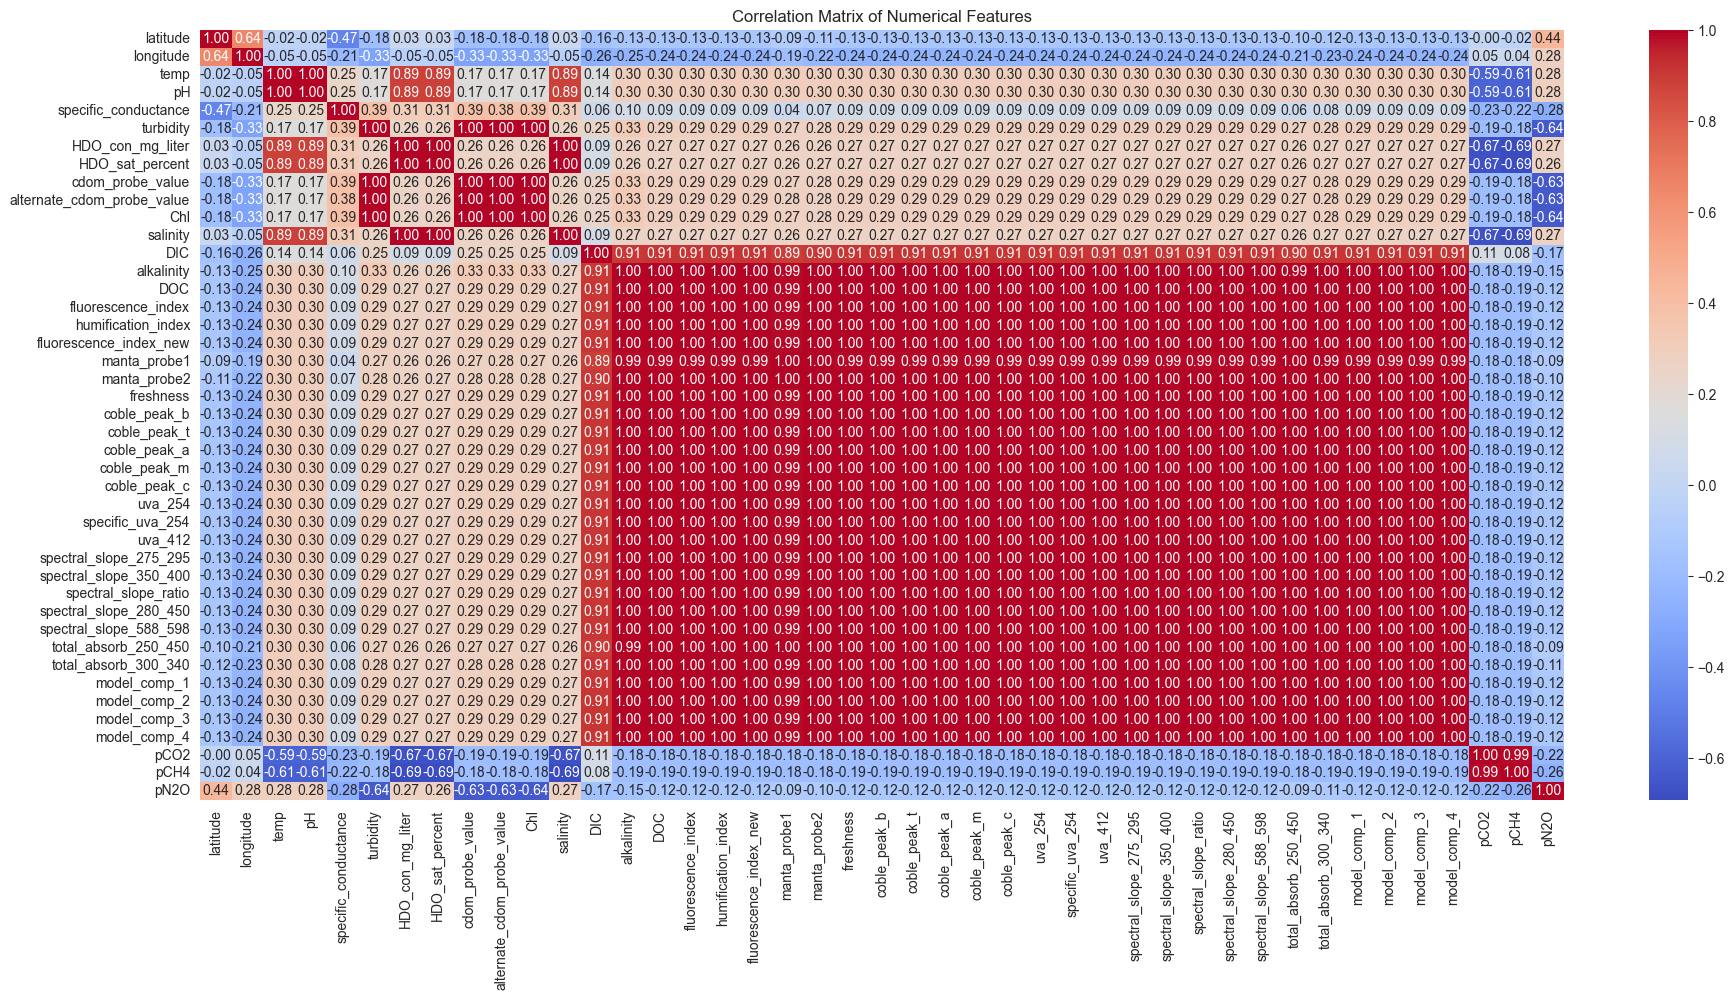

In [13]:
# Optionally, visualize the correlation matrix using a heatmap
# The heatmap is a powerful visualization tool provided by seaborn to show the correlation matrix in a more digestible form.
# Each cell in the heatmap represents the correlation coefficient between two variables.
# The annot=True option adds the numerical values of the correlations on top of the heatmap cells, and cmap='coolwarm' defines the color scheme.
# Larger figures (figsize) are used to make sure that all elements are clearly visible, especially when dealing with many variables.
plt.figure(figsize=(22, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

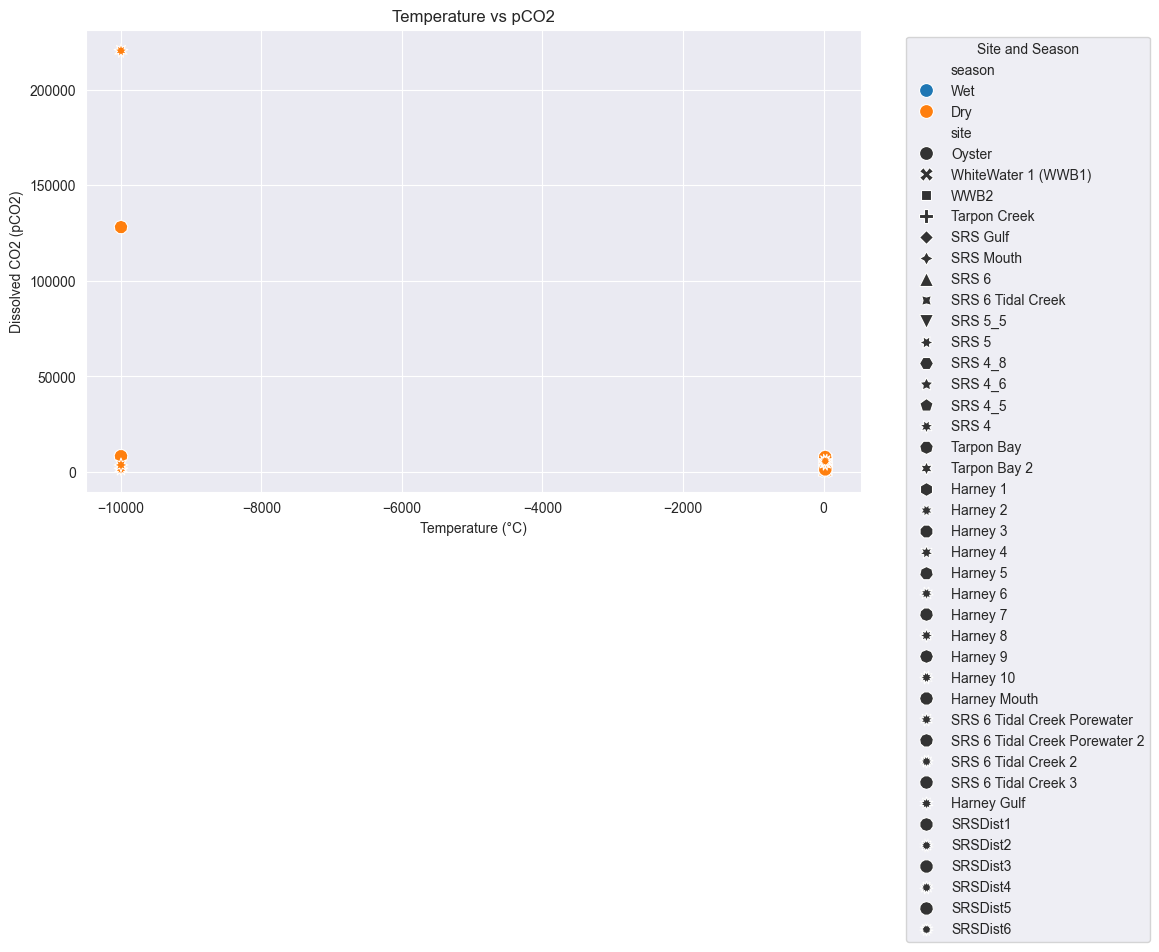

In [14]:
# Scatter plot for Temperature vs pCO2
# This plot visualizes the relationship between temperature (temp) and dissolved carbon dioxide (pCO2).
# A scatter plot helps in identifying trends, patterns, or correlations between two continuous variables.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='pCO2', data=data, hue='season', style='site', s=100)
plt.title('Temperature vs pCO2')
plt.xlabel('Temperature (°C)')
plt.ylabel('Dissolved CO2 (pCO2)')
plt.legend(title='Site and Season', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

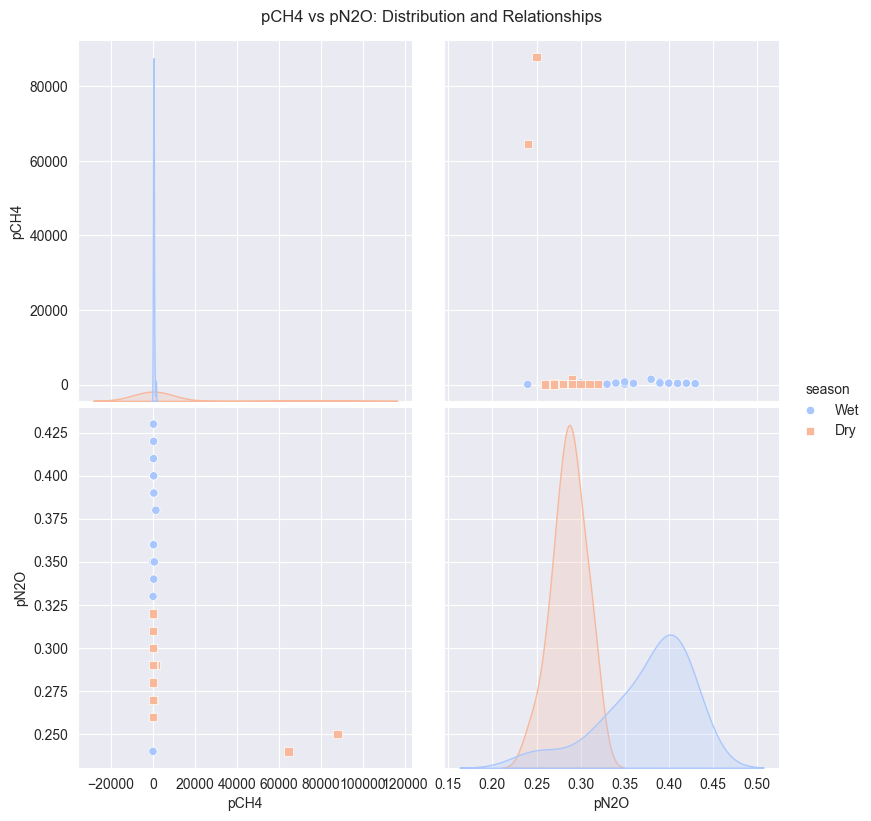

In [15]:
# Pairplot for pCH4 vs pN2O
# A pairplot is useful for visualizing the pairwise relationships in a dataset, especially when dealing with multiple variables.
# Here, we compare the distributions and relationships of pCH4 and pN2O across different sites and seasons.
sns.pairplot(data, vars=['pCH4', 'pN2O'], hue='season', palette='coolwarm', markers=["o", "s"], height=4)
plt.suptitle('pCH4 vs pN2O: Distribution and Relationships', y=1.02)
plt.show()

In [16]:
# Create a GeoDataFrame for geographical plotting
# We convert the DataFrame to a GeoDataFrame, which allows us to plot the data on a map using latitude and longitude.
# This is essential for any spatial analysis as it integrates the geographical component into the data.
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.longitude, data.latitude))

# Plotting the geographical distribution of pCO2 levels using Folium
# Folium is a powerful library for creating interactive maps, and here we visualize the pCO2 levels across different sites.
m = folium.Map(location=[data['latitude'].mean(), data['longitude'].mean()], zoom_start=10)

# Adding pCO2 data points to the map with varying colors based on their levels
# Each point on the map represents a measurement site, and the color intensity reflects the pCO2 concentration at that site.
for idx, row in gdf.iterrows():
    folium.CircleMarker(
        [row['latitude'], row['longitude']],
        radius=8,
        fill=True,
        fill_color='blue',
        color=None,
        fill_opacity=0.6,
        popup=folium.Popup(f"Site: {row['site']}<br>pCO2: {row['pCO2']}<br>Temp: {row['temp']}°C", max_width=200)
    ).add_to(m)

# Display the map
m

C:\Users\pinar\AppData\Local\Temp\ipykernel_11996\740683783.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='pCO2', data=data, palette='coolwarm')


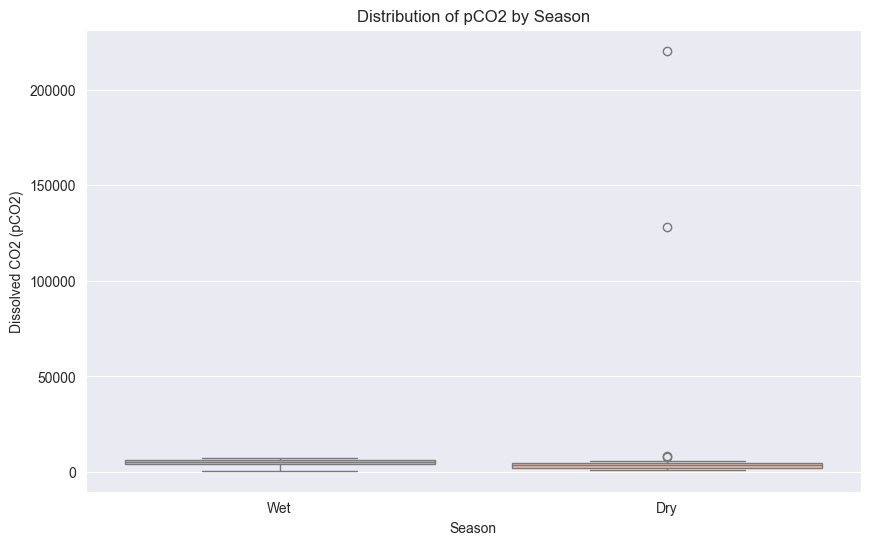

In [17]:
# Boxplot for pCO2 by Season
# A boxplot is used here to visualize the distribution of pCO2 levels across different seasons.
# Boxplots are effective in showing the spread, central tendency, and outliers in the data.
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='pCO2', data=data, palette='coolwarm')
plt.title('Distribution of pCO2 by Season')
plt.xlabel('Season')
plt.ylabel('Dissolved CO2 (pCO2)')
plt.show()

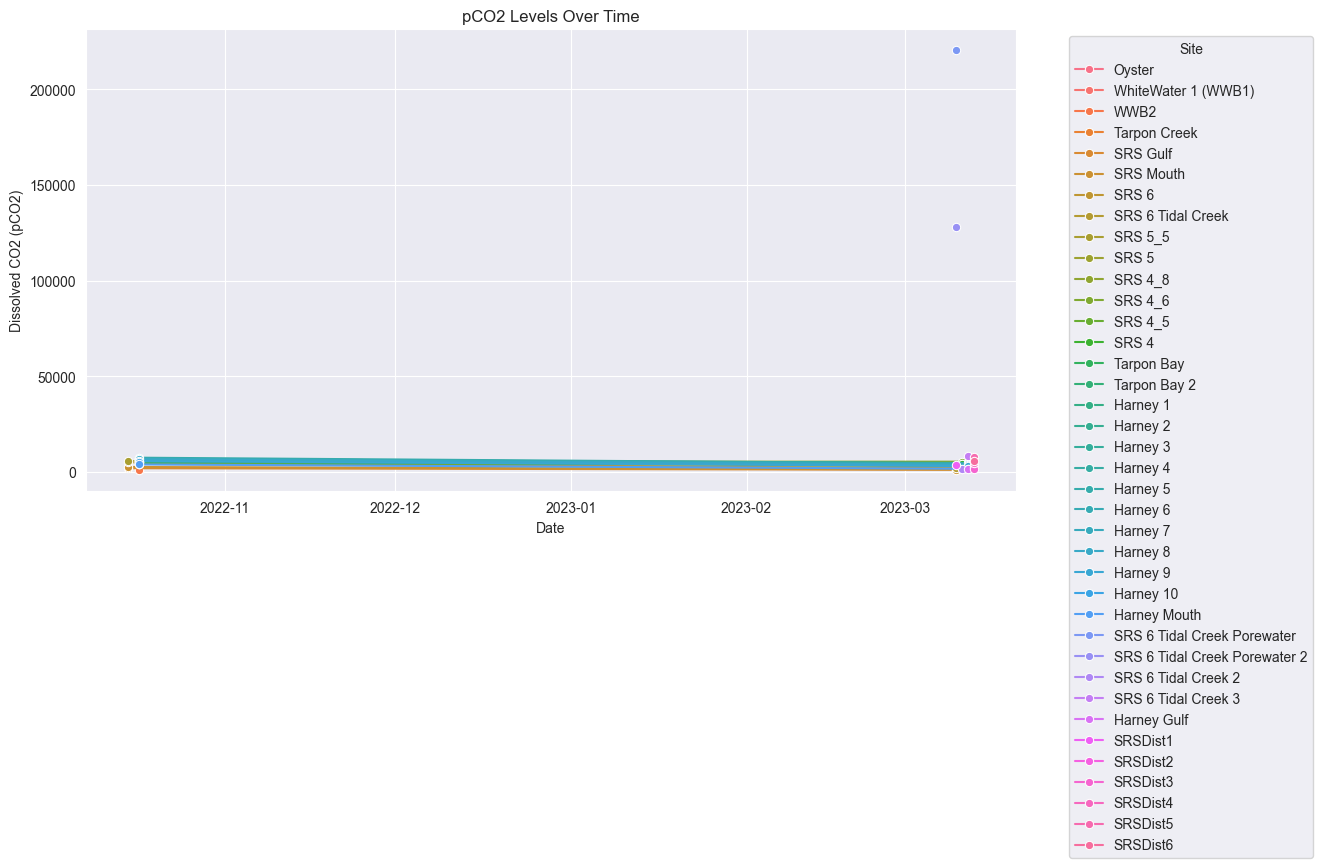

In [18]:
# Time series analysis of pCO2 levels over time
# Time series plots allow us to observe trends and patterns over time. 
# Here, we examine how pCO2 levels vary throughout the measurement period.
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='pCO2', data=data, hue='site', marker='o')
plt.title('pCO2 Levels Over Time')
plt.xlabel('Date')
plt.ylabel('Dissolved CO2 (pCO2)')
plt.legend(title='Site', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [19]:
# Create a new feature: the difference between the maximum and minimum temperature for each site
# This feature 'temp_range' represents the temperature variability at each site.
# Temperature variability can be an important factor affecting pCO2 levels, as large temperature swings may influence gas solubility.
data['temp_range'] = data.groupby('site')['temp'].transform(lambda x: x.max() - x.min())

# Display the first few rows to check the new feature
# After creating the new feature, it's essential to inspect the data to ensure that the transformation was successful.
# Here, we check the first few rows of the 'site', 'temp', and 'temp_range' columns to verify the new feature.
data[['site', 'temp', 'temp_range']].head()

site   temp  temp_range
0               Oyster  28.97        0.00
1  WhiteWater 1 (WWB1)  28.92        0.00
2                 WWB2  28.67        0.00
3         Tarpon Creek  28.29        0.00
4             SRS Gulf  29.18        3.61

In [20]:
# Select features for regression
# We choose temperature, pH, and the newly created temp_range as predictors for pCO2.
# These features are selected based on their potential impact on pCO2 levels.
X = data[['temp', 'pH', 'temp_range']]
y = data['pCO2']

In [21]:
# Split the data into training and testing sets
# The data is split into two sets: one for training the model and the other for testing its performance.
# A typical split is 80% training data and 20% testing data, which ensures that the model is trained on most of the data while still being tested on unseen data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Create and train the linear regression model
# The LinearRegression class from scikit-learn is used to create the regression model.
# The model is then trained on the training data (X_train, y_train) using the fit method.
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [23]:
# Make predictions on the test set
# After training, the model is used to predict pCO2 levels on the test data.
# This step allows us to evaluate how well the model generalizes to new, unseen data.
y_pred = model.predict(X_test)

In [24]:
# Evaluate the model
# The performance of the model is assessed using metrics like Mean Squared Error (MSE) and R-squared.
# MSE measures the average squared difference between observed and predicted values, while R-squared indicates how well the model explains the variance in the data.
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [25]:
# Display the evaluation results
# Here we print out the MSE and R-squared values to understand the model's performance.
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 2081123612.065243
R-squared: -692.1482284484565


In [26]:
# Training a Random Forest Regressor
# RandomForestRegressor creates a forest of decision trees and averages their predictions to improve accuracy.
# The n_estimators parameter defines the number of trees in the forest.
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

RandomForestRegressor(random_state=42)

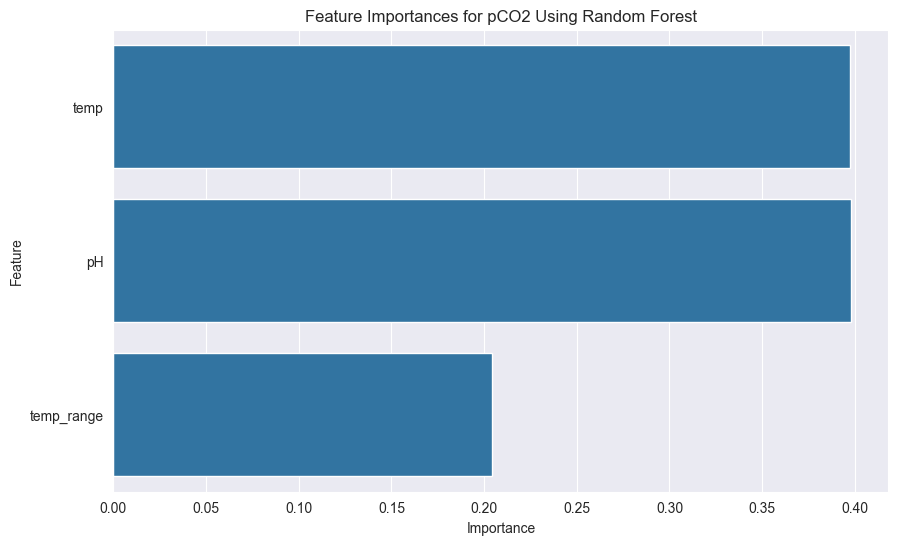

In [27]:
# Plotting the feature importances
# Feature importance tells us how much each feature contributes to the prediction of the target variable.
# Higher values indicate more important features.
plt.figure(figsize=(10, 6))
sns.barplot(x=rf_model.feature_importances_, y=X.columns)
plt.title('Feature Importances for pCO2 Using Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [28]:
# Create a connection to the database
# Here, we are creating an SQLite database named 'environmental_data.db'.
# SQLite is a lightweight database that is easy to set up and use for local storage.
engine = create_engine('sqlite:///environmental_data.db')

In [29]:
# Save the processed DataFrame to a SQL table
# The to_sql method saves the DataFrame to a SQL table named 'processed_data'.
# The if_exists='replace' option ensures that if the table already exists, it will be replaced with the new data.
data.to_sql('processed_data', engine, index=False, if_exists='replace')

59

In [30]:
# Verify that the data was loaded correctly
# A quick query to ensure that the data was saved correctly to the database.
loaded_data = pd.read_sql('processed_data', engine)
print("Data loaded into database:\n", loaded_data.head())

Data loaded into database:
                   site season       date   time  latitude  longitude   temp  \
0               Oyster    Wet 2022-10-17  15:45  25.34187  -81.05741  28.97   
1  WhiteWater 1 (WWB1)    Wet 2022-10-17  -9999  25.30627  -81.01984  28.92   
2                 WWB2    Wet 2022-10-17  -9999  25.27462  -80.98427  28.67   
3         Tarpon Creek    Wet 2022-10-17  17:00  25.20855  -80.93024  28.29   
4             SRS Gulf    Wet 2022-10-15  13:15  25.35741  -81.13770  29.18   

     pH  specific_conductance  turbidity  HDO_con_mg_liter  HDO_sat_percent  \
0  8.04               21500.0    -9999.0              3.68             52.8   
1  8.66               14390.0    -9999.0              7.29            101.9   
2  8.56               15140.0    -9999.0              6.78             94.6   
3  8.00              208310.0    -9999.0              2.57             36.3   
4  8.18               38500.0    -9999.0              4.24             65.1   

   cdom_probe_value  a

In [31]:
# Define the ETL process function
def etl_process():
    """
    This function performs the ETL (Extract, Transform, Load) process.
    It is scheduled to run automatically at specified times using the 'schedule' module.
    The function can include any data extraction, transformation, and loading steps necessary for your project.
    """
    # Logging the start of the ETL process
    logging.info("ETL process started.")

    # Example ETL steps (replace with your actual ETL code):
try:
    # Extract data from a source (e.g., reading from a CSV file)
    print("Loading CSV file...")
    data = pd.read_csv('data/BLUEFLUX_Transect_Shark_Haney_Rivers_TarponBay.csv')
    print("CSV file loaded successfully.")
    
    # Transform data (e.g., filling missing values, converting data types)
    print("Transforming data...")
    data['temp'].fillna(data['temp'].mean(), inplace=True)
    data['date'] = pd.to_datetime(data['date'], errors='coerce')
    print("Data transformation completed.")

    # Load data into a database (e.g., saving to an SQLite database)
    print("Loading data into SQLite database...")
    engine = create_engine('sqlite:///environmental_data.db')
    data.to_sql('processed_data', engine, index=False, if_exists='replace')
    print("Data loaded into database successfully.")

    # Logging the success of the ETL process
    logging.info("ETL process completed successfully.")
    print("ETL process completed successfully.")

except Exception as e:
    # If an error occurs, log the error and print the traceback
    logging.error("ETL process failed.")
    logging.error(traceback.format_exc())
    print("ETL process failed.")
    print(traceback.format_exc())

Loading CSV file...
CSV file loaded successfully.
Transforming data...
Data transformation completed.
Loading data into SQLite database...
Data loaded into database successfully.
ETL process completed successfully.


In [32]:
# Schedule the ETL process to run at a specific time
# The schedule.every().day.at("01:00").do(etl_process) line schedules the ETL process to run daily at 01:00 AM.
# You can adjust the time or frequency based on your specific needs (e.g., schedule.every().hour.do(etl_process)).
schedule.every().day.at("01:00").do(etl_process)

Every 1 day at 01:00:00 do etl_process() (last run: [never], next run: 2024-08-12 01:00:00)

In [33]:
def run_scheduler():
    """
    This function runs the scheduler in an infinite loop.
    The loop can be terminated after a certain amount of time has passed.
    """
    start_time = time.time()  # Record the start time
    run_duration = 30  # Time to run the scheduler (in seconds)

    while True:
        schedule.run_pending()  # Check if any scheduled task is due to run and execute it
        time.sleep(1)           # Sleep for 1 second before checking again

        # Check if the elapsed time exceeds the run duration
        elapsed_time = time.time() - start_time
        if elapsed_time > run_duration:
            print("Scheduler run duration exceeded. Stopping...")
            break  # Exit the loop after the specified duration
def example_task():
    """
    An example task that could be scheduled to run periodically.
    """
    print("Example task is running")

In [34]:
# Creating a separate thread for the scheduler
scheduler_thread = threading.Thread(target=run_scheduler)

In [35]:
# Starting the scheduler thread
scheduler_thread.start()

In [36]:
# Scheduling the example task to run every 10 seconds
schedule.every(10).seconds.do(example_task)

Every 10 seconds do example_task() (last run: [never], next run: 2024-08-11 16:10:07)

In [37]:
# Scheduling the example task to run every 10 seconds
schedule.every(10).seconds.do(example_task)

Every 10 seconds do example_task() (last run: [never], next run: 2024-08-11 16:10:07)

In [38]:
# Main program can continue executing other tasks concurrently
for _ in range(10):
    print("Main program is running...")
    time.sleep(5)  # Sleep for 5 seconds to simulate a long-running process

Main program is running...
Main program is running...
Main program is running...
Example task is running
Example task is running
Main program is running...
Main program is running...
Example task is running
Example task is running
Main program is running...
Main program is running...
Scheduler run duration exceeded. Stopping...
Main program is running...
Main program is running...
Main program is running...


In [39]:
def add_new_task(task_function, interval, unit='seconds'):
    """
    Dynamically adds a new task to the scheduler.
    task_function: The function to be scheduled.
    interval: The time interval (e.g., 10).
    unit: The time unit (e.g., 'seconds', 'minutes', 'hours').
    """
    if unit == 'seconds':
        schedule.every(interval).seconds.do(task_function)
    elif unit == 'minutes':
        schedule.every(interval).minutes.do(task_function)
    elif unit == 'hours':
        schedule.every(interval).hours.do(task_function)
    elif unit == 'days':
        schedule.every(interval).days.do(task_function)
    elif unit == 'weeks':
        schedule.every(interval).weeks.do(task_function)

    logging.info(f"New task added: {task_function.__name__} to run every {interval} {unit}.")
    print(f"New task added: {task_function.__name__} to run every {interval} {unit}.")

# Example of adding a new task dynamically
add_new_task(example_task, 15, 'seconds')

New task added: example_task to run every 15 seconds.


In [40]:
def log_task_report(task_name, status, start_time, end_time):
    """
    Logs the report of a task's execution.
    task_name: Name of the task.
    status: Success or Failure.
    start_time: When the task started.
    end_time: When the task ended.
    """
    duration = end_time - start_time
    report = f"Task: {task_name}, Status: {status}, Start: {start_time}, End: {end_time}, Duration: {duration}\n"
    with open('task_reports.log', 'a') as f:
        f.write(report)

def example_task_with_reporting():
    """
    An example task that includes reporting on its execution.
    """
    start_time = time.time()
    try:
        # Task logic goes here
        print("Example task with reporting is running...")
        time.sleep(2)  # Simulating task duration

        # Log success and generate report
        logging.info("Example task completed successfully.")
        log_task_report("example_task_with_reporting", "Success", start_time, time.time())
    except Exception as e:
        # Log failure and generate report
        logging.error("Example task failed.")
        logging.error(traceback.format_exc())
        log_task_report("example_task_with_reporting", "Failure", start_time, time.time())

# Scheduling the task with reporting
schedule.every(20).seconds.do(example_task_with_reporting)

Every 20 seconds do example_task_with_reporting() (last run: [never], next run: 2024-08-11 16:11:07)

In [41]:
# Initialize counters and accumulators for the summary report
task_count = 0  # To count the total number of tasks executed
successful_tasks = 0  # To count how many tasks have completed successfully
failed_tasks = 0  # To count how many tasks have failed
total_time_spent = 0  # To accumulate the total time spent on all tasks

# Setting a condition to stop after a certain number of tasks
max_tasks = 10  # Maximum number of tasks to run before stopping

def example_task():
    """
    This is an example task that gets scheduled to run periodically.
    The function logs its success or failure and updates the counters.
    """
    global task_count, successful_tasks, failed_tasks, total_time_spent

    task_count += 1  # Increment the total task count
    start_time = time.time()  # Record the start time of the task

    try:
        print("Example task is running...")
        time.sleep(2)  # Simulate the task's processing time with a sleep (2 seconds)

        # If the task runs successfully without exceptions
        successful_tasks += 1  # Increment the successful task count
        logging.info("Example task completed successfully.")
    except Exception as e:
        # If an exception occurs during the task
        failed_tasks += 1  # Increment the failed task count
        logging.error("Example task failed.")  # Log an error message
        logging.error(traceback.format_exc())  # Log the full stack trace of the error
    finally:
        # Calculate and accumulate the time spent on this task
        end_time = time.time()  # Record the end time of the task
        total_time_spent += (end_time - start_time)  # Add the duration to the total time spent

        # Stop the schedule if the maximum number of tasks has been reached
        if task_count >= max_tasks:
            print("Maximum number of tasks reached. Stopping the scheduler.")
            return schedule.CancelJob  # This will stop the task from being scheduled again

def summary_report():
    """
    This function prints a summary report of all tasks executed.
    The report includes the total number of tasks, number of successes and failures,
    and the total time spent on all tasks.
    """
    print("\n--- Summary Report ---")
    print(f"Total tasks executed: {task_count}")  # Print the total number of tasks executed
    print(f"Successful tasks: {successful_tasks}")  # Print the number of successful tasks
    print(f"Failed tasks: {failed_tasks}")  # Print the number of failed tasks
    print(f"Total time spent on tasks: {total_time_spent:.2f} seconds")  # Print the total time spent in seconds
    print("----------------------\n")

    # Stop the report after the maximum number of tasks
    if task_count >= max_tasks:
        print("Stopping summary report as the maximum number of tasks has been executed.")
        return schedule.CancelJob  # This will stop the report from being scheduled again

# Schedule the example task to run every 10 seconds
schedule.every(10).seconds.do(example_task)

# Schedule the summary report to run every 60 seconds
schedule.every(60).seconds.do(summary_report)

# Infinite loop to keep the scheduler running
while True:
    schedule.run_pending()  # run_pending() checks if any scheduled task is due to run and executes it
    time.sleep(1)  # Sleep for 1 second to prevent the loop from consuming too much CPU

    # Stop the loop if the maximum number of tasks has been executed
    if task_count >= max_tasks:
        print("All scheduled tasks completed. Exiting the program.")
        break  # Exit the loop to stop the program

Example task is running
Example task is running
Example task is running...
Example task is running
Example task is running
Example task is running
Example task with reporting is running...
Example task is running
Example task is running
Example task is running...
Example task is running
Example task is running
Example task is running
Example task is running...
Example task with reporting is running...
Example task is running
Example task is running
Example task is running
Example task is running...
Example task is running
Example task is running
Example task is running...

--- Summary Report ---
Total tasks executed: 5
Successful tasks: 5
Failed tasks: 0
Total time spent on tasks: 10.00 seconds
----------------------

Example task is running
Example task with reporting is running...
Example task is running
Example task is running
Example task is running...
Example task is running
Example task is running
Example task is running
Example task is running...
Example task with reporting is r

In [42]:
# Step 1: Define the parameter grid for hyperparameter tuning.
# This grid includes a range of values for different hyperparameters of the Random Forest model.
# n_estimators: Number of trees in the forest.
# max_depth: Maximum depth of each tree, controlling overfitting.
# min_samples_split: Minimum number of samples required to split an internal node.
# min_samples_leaf: Minimum number of samples required to be at a leaf node.
# bootstrap: Whether bootstrap samples are used when building trees.
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Step 2: Instantiate a RandomForestRegressor model.
# The RandomForestRegressor is initialized with a random state for reproducibility.
rf_model = RandomForestRegressor(random_state=42)

# Step 3: Setup GridSearchCV for hyperparameter tuning with 5-fold cross-validation.
# GridSearchCV systematically works through multiple combinations of parameter tunes, cross-validating as it goes.
# This means that it will automatically find the best combination of hyperparameters.
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='r2')

# Step 4: Fit the GridSearchCV model on the training data.
# This will find the best set of hyperparameters by training multiple models with different hyperparameter combinations.
grid_search.fit(X_train, y_train)

# Step 5: Print the best parameters found by GridSearchCV.
# This outputs the best combination of hyperparameters for the model.
print(f"Best parameters: {grid_search.best_params_}")

# Step 6: Save the best model for future use.
# The best model found by GridSearchCV is saved using joblib for later use.
joblib.dump(grid_search.best_estimator_, 'models/best_rf_model.pkl')

# Note: You can load the saved model later with the following command:
# best_model = joblib.load('models/best_rf_model.pkl')

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


['models/best_rf_model.pkl']

In [43]:
# Step 1: Instantiate individual models to be combined.
# The models chosen here are Linear Regression, RandomForestRegressor, and Support Vector Regressor.
model1 = LinearRegression()
model2 = RandomForestRegressor(n_estimators=100, random_state=42)
model3 = SVR()

# Step 2: Combine models using Voting Regressor.
# Voting Regressor is an ensemble meta-estimator that fits several base regressors and averages their individual predictions.
# It gives better predictions by reducing model variance and improving robustness.
ensemble_model = VotingRegressor(estimators=[
    ('lr', model1),
    ('rf', model2),
    ('svr', model3)
])

# Step 3: Fit the ensemble model on the training data.
# The combined model is trained using the training dataset.
ensemble_model.fit(X_train, y_train)

# Step 4: Save the ensemble model for future use.
# The trained ensemble model is saved using joblib for later use.
joblib.dump(ensemble_model, 'models/ensemble_model.pkl')

['models/ensemble_model.pkl']

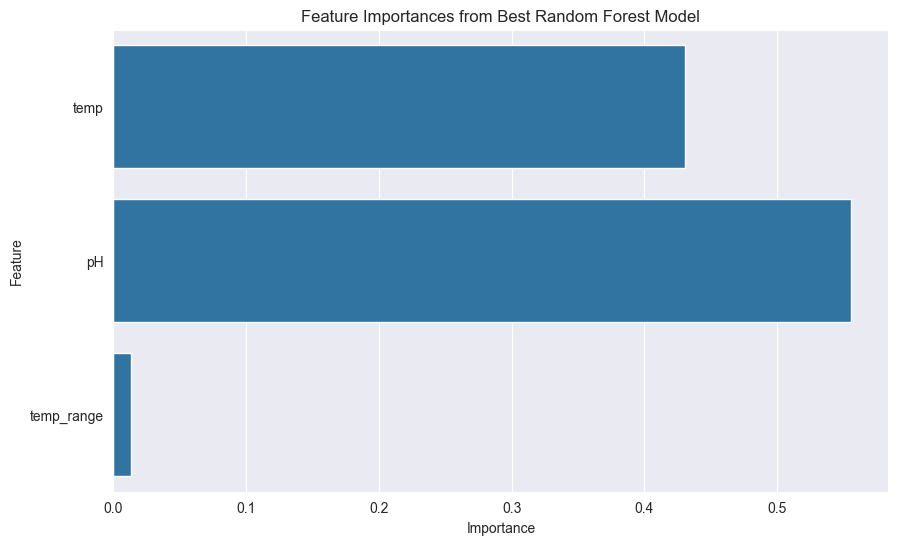

In [44]:
# Step 1: Load the best model saved from GridSearchCV
# The model is loaded from the previously saved file.
best_model = joblib.load('models/best_rf_model.pkl')

# Step 2: Retrieve the feature importances from the model.
# Feature importance provides insight into which variables are most influential in making predictions.
importances = best_model.feature_importances_

# Step 3: Plot the feature importances.
# The importance of each feature is visualized using a bar plot, helping to identify key predictors.
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=X.columns)
plt.title('Feature Importances from Best Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

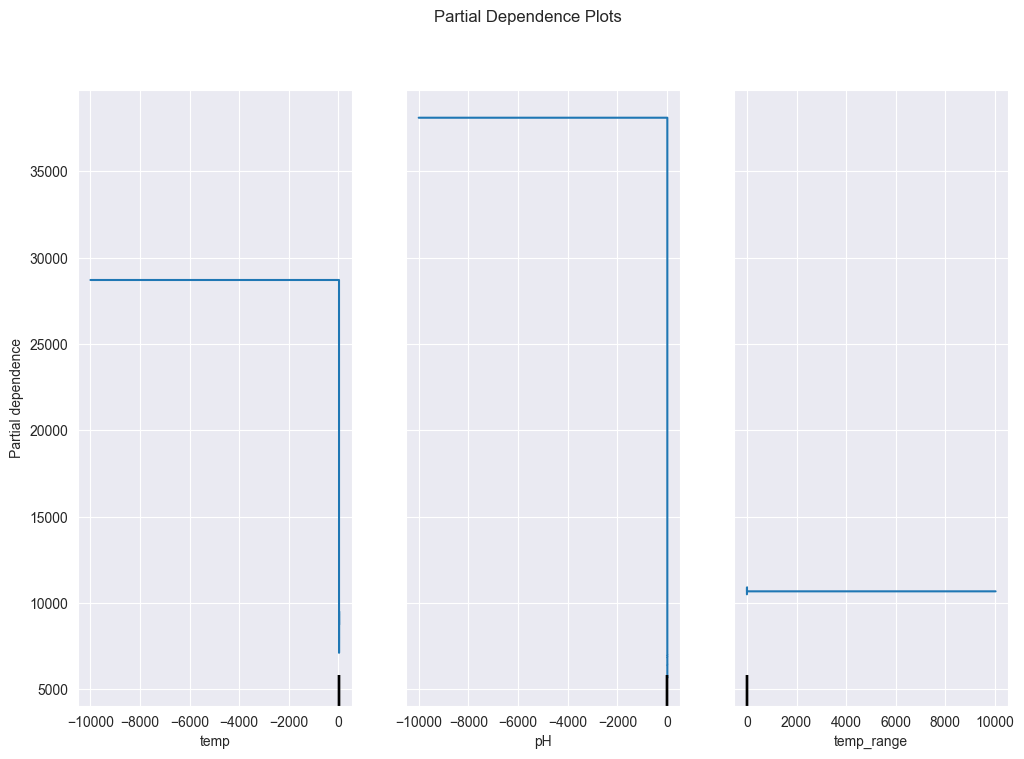

In [45]:
# Import the necessary library for partial dependence display
from sklearn.inspection import PartialDependenceDisplay

# Step 1: Plot partial dependence for the most important features.
# PartialDependenceDisplay creates plots that show the relationship between a selected feature and the predicted outcome,
# while marginalizing over the values of all other features.
fig, ax = plt.subplots(figsize=(12, 8))
PartialDependenceDisplay.from_estimator(
    best_model,  # The trained model
    X_train,  # The training data
    features=[0, 1, 2],  # The indices of the features to plot
    feature_names=X.columns,  # Names of the features
    ax=ax  # The axes on which to plot
)
plt.suptitle('Partial Dependence Plots')
plt.show()

In [46]:
# Step 1: Initialize the Dash app.
# Dash is a web-based framework for building interactive web applications with Python.
app = dash.Dash(__name__)

# Step 2: Define the layout of the app.
# The layout consists of a header, a scatter plot, a slider, and an output container.
app.layout = html.Div(children=[
    html.H1(children='Interactive Dashboard'),

    dcc.Graph(
        id='scatter-plot',
        figure={
            'data': [
                {'x': data['temp'], 'y': data['pCO2'], 'type': 'scatter', 'name': 'Temp vs pCO2'}
            ],
            'layout': {
                'title': 'Temperature vs pCO2'
            }
        }
    ),
    
    dcc.Slider(
        id='temp-slider',
        min=data['temp'].min(),
        max=data['temp'].max(),
        value=data['temp'].mean(),
        marks={str(temp): str(temp) for temp in data['temp'].unique()},
        step=None
    ),

    html.Div(id='output-container-slider')
])

# Step 3: Define a callback function to update the graph based on slider input.
# This function dynamically updates the graph when the user changes the slider value.
@app.callback(
    Output('scatter-plot', 'figure'),
    [Input('temp-slider', 'value')]
)
def update_figure(selected_temp):
    filtered_data = data[data['temp'] >= selected_temp]
    return {
        'data': [{'x': filtered_data['temp'], 'y': filtered_data['pCO2'], 'type': 'scatter', 'name': 'Temp vs pCO2'}],
        'layout': {'title': f'Temperature >= {selected_temp} vs pCO2'}
    }

# Step 4: Run the Dash app.
# This command runs the server, making the dashboard accessible in the web browser.
if __name__ == '__main__':
    app.run_server(debug=True)

In [47]:
# Step 1: Create a 3D Scatter Plot.
# A 3D scatter plot is useful for visualizing relationships between three variables in three-dimensional space.
fig = go.Figure(data=[go.Scatter3d(
    x=data['temp'],
    y=data['pCO2'],
    z=data['pCH4'],
    mode='markers',
    marker=dict(
        size=5,
        color=data['pCO2'],  # Color by pCO2
        colorscale='Viridis'
    )
)])
# Customize and display the 3D plot
fig.update_layout(title='3D Scatter Plot of Temperature, pCO2, and pCH4',
                  scene=dict(
                      xaxis_title='Temperature (°C)',
                      yaxis_title='pCO2',
                      zaxis_title='pCH4'),
                  margin=dict(l=0, r=0, b=0, t=50))

# Show the 3D plot
fig.show()

# Step 2: Create a heatmap for geographic data.
# Heatmaps are useful for visualizing the density or intensity of values over a geographic area.
fig = px.density_mapbox(gdf, lat='latitude', lon='longitude', z='pCO2', radius=10,
                        center=dict(lat=gdf['latitude'].mean(), lon=gdf['longitude'].mean()), zoom=10,
                        mapbox_style="stamen-terrain")

# Customize and display the heatmap
fig.update_layout(title='Heatmap of pCO2 Concentrations')
fig.show()

In [48]:
def generate_performance_report():
    """
    Generates a performance report of the models and saves it as a PDF.
    The report includes key performance metrics and any additional analysis.
    """
    # Step 1: Create a new PDF document.
    pdf = FPDF()
    pdf.add_page()

    # Step 2: Add a title to the report.
    pdf.set_font("Arial", size=12)
    pdf.cell(200, 10, txt="Model Performance Report", ln=True, align='C')

    # Step 3: Add model performance metrics to the report.
    # These include Mean Squared Error (MSE) and R-squared values.
    pdf.cell(200, 10, txt=f"Mean Squared Error: {mse:.4f}", ln=True, align='L')
    pdf.cell(200, 10, txt=f"R-squared: {r2:.4f}", ln=True, align='L')

    # Step 4: Save the report as a PDF file.
    pdf.output("models/performance_report.pdf")

# Generate the performance report
generate_performance_report()

Unique values in the 'season' column: ['Wet' 'Dry']
Number of samples in Spring: 32
Number of samples in Summer: 0
Number of samples in Fall: 27
Number of samples in Winter: 0
Analyzing season: Spring
Spring - Mean Squared Error: 4305517.879807927
Spring - R-squared: -0.34394877869090434


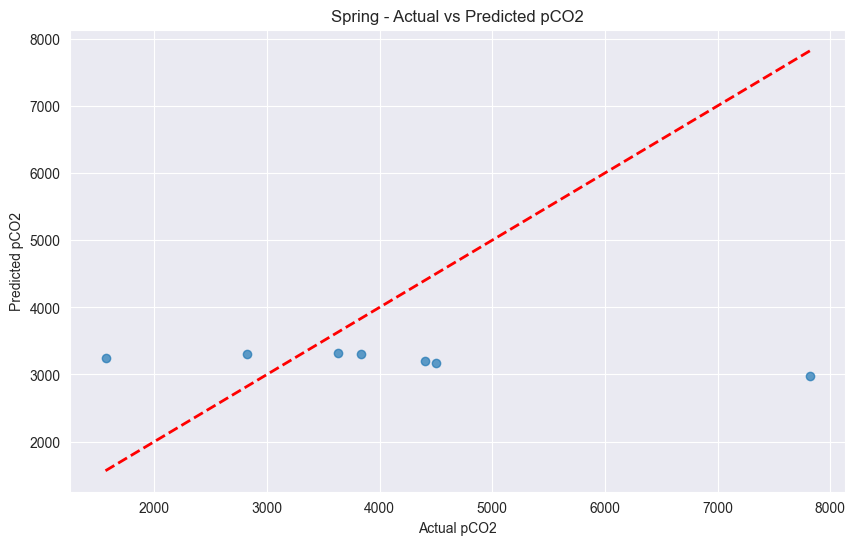

Summer dataset is empty. Skipping analysis.
Analyzing season: Fall
Fall - Mean Squared Error: 446353.6594273822
Fall - R-squared: 0.6889907614472144


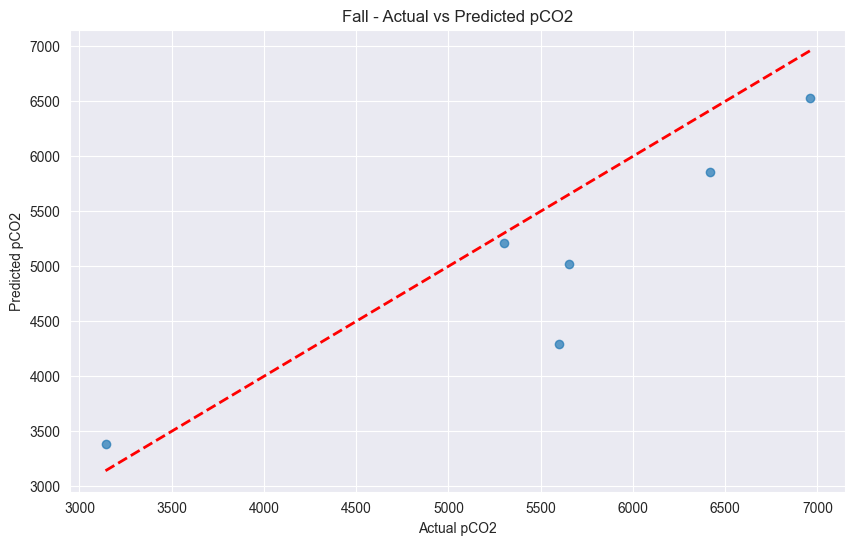

Winter dataset is empty. Skipping analysis.


In [49]:
# Assuming data is already loaded and pre-processed as 'data'

# Step 1: Check the unique values in the 'season' column
print("Unique values in the 'season' column:", data['season'].unique())

# Step 2: Normalize season labels if needed
data['season'] = data['season'].str.capitalize()

# Step 3: Generate season information if missing or inconsistent
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

# Apply the function to create a new 'season' column if necessary
data['season'] = data['date'].apply(get_season)

# Step 4: Check the number of samples in each season
spring_data = data[data['season'] == 'Spring']
summer_data = data[data['season'] == 'Summer']
fall_data = data[data['season'] == 'Fall']
winter_data = data[data['season'] == 'Winter']

print(f"Number of samples in Spring: {len(spring_data)}")
print(f"Number of samples in Summer: {len(summer_data)}")
print(f"Number of samples in Fall: {len(fall_data)}")
print(f"Number of samples in Winter: {len(winter_data)}")

# Function for performing seasonal analysis
def seasonal_analysis(season_name, season_data):
    """
    Perform model training and evaluation on a specific season's data.
    Parameters:
    - season_name: The name of the season (e.g., 'Spring').
    - season_data: The data for that specific season.
    """
    print(f"Analyzing season: {season_name}")  # Indicate which season is being analyzed.
    
    # Select features and target variable for the model.
    X_season = season_data[['temp', 'pH']]  # Features: Temperature, pH
    y_season = season_data['pCO2']  # Target variable: pCO2 levels
    
    # Step 3: Split the data into training and testing sets.
    X_train, X_test, y_train, y_test = train_test_split(X_season, y_season, test_size=0.2, random_state=42)
    
    # Step 4: Train the Linear Regression model on the training data.
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Step 5: Make predictions on the testing set.
    y_pred = model.predict(X_test)
    
    # Step 6: Evaluate model performance using Mean Squared Error (MSE) and R-squared.
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Step 7: Display the evaluation results.
    print(f"{season_name} - Mean Squared Error: {mse}")
    print(f"{season_name} - R-squared: {r2}")
    
    # Step 8: Visualize the results
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
    plt.title(f'{season_name} - Actual vs Predicted pCO2')
    plt.xlabel('Actual pCO2')
    plt.ylabel('Predicted pCO2')
    plt.show()

# Step 9: Perform analysis for each season only if the dataset is not empty.
if len(spring_data) > 0:
    seasonal_analysis('Spring', spring_data)
else:
    print("Spring dataset is empty. Skipping analysis.")

if len(summer_data) > 0:
    seasonal_analysis('Summer', summer_data)
else:
    print("Summer dataset is empty. Skipping analysis.")

if len(fall_data) > 0:
    seasonal_analysis('Fall', fall_data)
else:
    print("Fall dataset is empty. Skipping analysis.")

if len(winter_data) > 0:
    seasonal_analysis('Winter', winter_data)
else:
    print("Winter dataset is empty. Skipping analysis.")


Number of samples in temperature range 20°C to 30°C: 54
Temperature 20°C to 30°C - Mean Squared Error: 2746523.545399305
Temperature 20°C to 30°C - R-squared: 0.08104713368833993


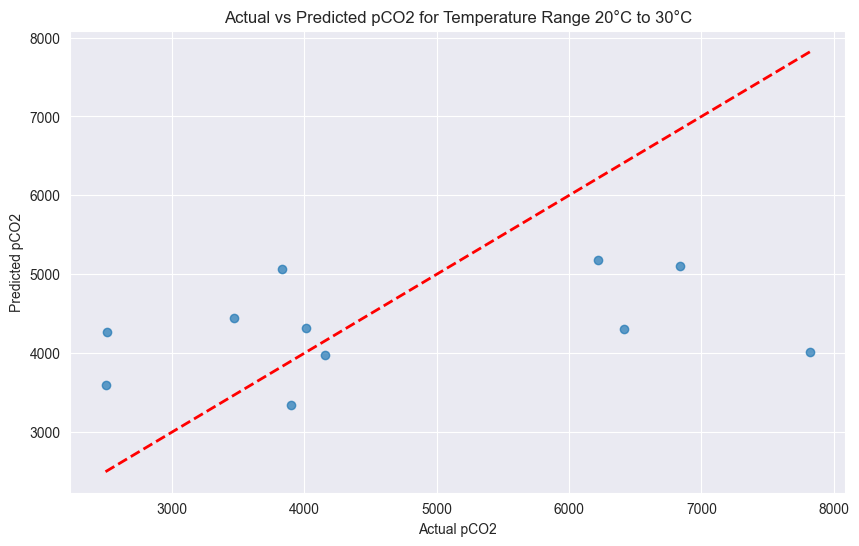

In [50]:
# Step 1: Filter the dataset based on a temperature range
# Let's analyze the impact of temperatures between 20°C and 30°C
temp_filtered_data = data[(data['temp'] >= 20) & (data['temp'] <= 30)]

# Check the number of samples in this temperature range
print(f"Number of samples in temperature range 20°C to 30°C: {len(temp_filtered_data)}")

if len(temp_filtered_data) > 0:
    # Step 2: Select features and target variable for the model
    X_temp_filtered = temp_filtered_data[['temp', 'pH']]  # Removed 'temp_range' as it does not exist
    y_temp_filtered = temp_filtered_data['pCO2']

    # Step 3: Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_temp_filtered, y_temp_filtered, test_size=0.2, random_state=42)

    # Step 4: Train the Linear Regression model on the training data
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Step 5: Make predictions on the testing set
    y_pred = model.predict(X_test)

    # Step 6: Evaluate model performance using Mean Squared Error (MSE) and R-squared
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Step 7: Display the evaluation results
    print(f"Temperature 20°C to 30°C - Mean Squared Error: {mse}")
    print(f"Temperature 20°C to 30°C - R-squared: {r2}")

    # Step 8: Visualize the results
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
    plt.title('Actual vs Predicted pCO2 for Temperature Range 20°C to 30°C')
    plt.xlabel('Actual pCO2')
    plt.ylabel('Predicted pCO2')
    plt.show()
else:
    print("No data available for the specified temperature range.")


Number of samples with low pH (< 7.0): 5
Number of samples with high pH (> 8.0): 5
Analyzing Low pH
Low pH - Mean Squared Error: 4848958019.491601
Low pH - R-squared: nan


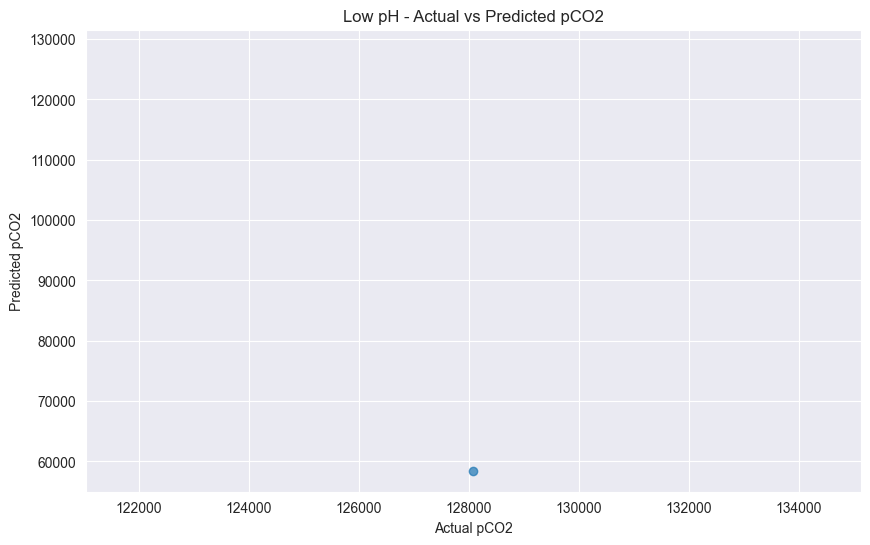

Analyzing High pH
High pH - Mean Squared Error: 513474.4284769351
High pH - R-squared: nan


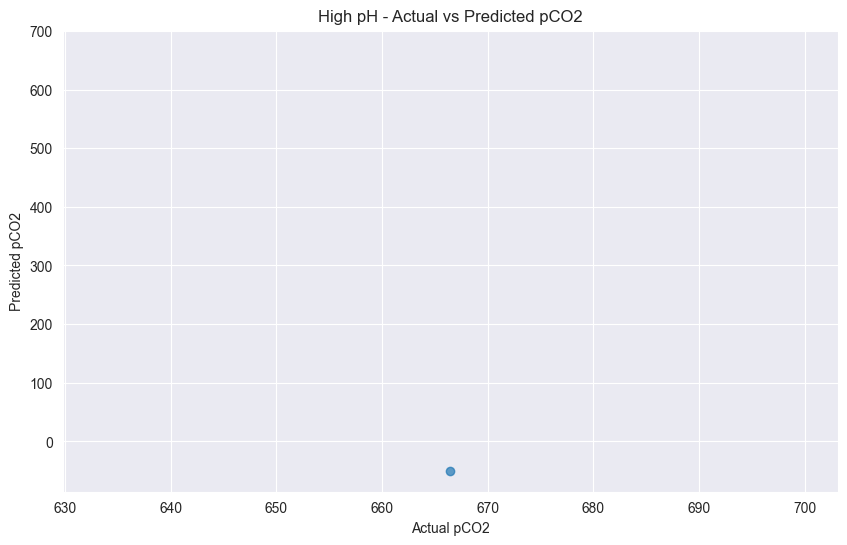

In [51]:
import warnings
from sklearn.exceptions import UndefinedMetricWarning

# Step 1: Define thresholds for low and high pH levels
# These thresholds will be used to filter the data into two categories: low pH and high pH.
low_pH_threshold = 7.0  # pH level considered low
high_pH_threshold = 8.0  # pH level considered high

# Step 2: Filter data based on pH levels
# We create two separate datasets: one for low pH values and another for high pH values.
low_pH_data = data[data['pH'] < low_pH_threshold]
high_pH_data = data[data['pH'] > high_pH_threshold]

# Step 3: Check the number of samples in each pH range
# This helps us understand how much data we have for each pH category.
print(f"Number of samples with low pH (< {low_pH_threshold}): {len(low_pH_data)}")
print(f"Number of samples with high pH (> {high_pH_threshold}): {len(high_pH_data)}")

# Step 4: Handle potential warnings
# Sometimes, when we have a very small dataset, the R^2 score can be undefined. 
# To avoid unnecessary warnings, we suppress these specific warnings.
warnings.filterwarnings(action='ignore', category=UndefinedMetricWarning)

# Function to analyze the impact of pH levels on pCO2
def pH_analysis(pH_category, pH_data):
    """
    This function performs model training and evaluation based on different pH levels.
    Parameters:
    - pH_category: A string indicating the category of pH being analyzed (e.g., 'Low pH', 'High pH').
    - pH_data: The filtered data corresponding to the pH category.
    """
    
    # Step 5: Indicate the pH category being analyzed
    print(f"Analyzing {pH_category}")
    
    # Step 6: Select features and the target variable
    # Features: 'temp' (Temperature) and 'pH' (acidity level)
    # Target: 'pCO2' (partial pressure of CO2)
    X_pH = pH_data[['temp', 'pH']]
    y_pH = pH_data['pCO2']
    
    # Step 7: Split the data into training and testing sets
    # 80% of the data will be used for training, and 20% will be reserved for testing the model.
    X_train, X_test, y_train, y_test = train_test_split(X_pH, y_pH, test_size=0.2, random_state=42)
    
    # Step 8: Train the Linear Regression model
    # Linear regression is chosen for its simplicity and interpretability.
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Step 9: Make predictions on the testing set
    y_pred = model.predict(X_test)
    
    # Step 10: Evaluate model performance using Mean Squared Error (MSE) and R-squared (R^2)
    # MSE measures the average squared difference between the observed and predicted values.
    # R^2 indicates how well the model explains the variance in the data; however, it can be undefined for small datasets.
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Step 11: Display the evaluation results
    print(f"{pH_category} - Mean Squared Error: {mse}")
    print(f"{pH_category} - R-squared: {r2}")
    
    # Step 12: Visualize the results
    # A scatter plot is used to compare the actual pCO2 values to the predicted ones.
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
    plt.title(f'{pH_category} - Actual vs Predicted pCO2')
    plt.xlabel('Actual pCO2')
    plt.ylabel('Predicted pCO2')
    plt.show()

# Step 13: Analyze low pH levels
# If there is sufficient data for low pH, the analysis function is called; otherwise, a message is printed.
if len(low_pH_data) > 0:
    pH_analysis('Low pH', low_pH_data)
else:
    print("No data available for low pH analysis.")

# Step 14: Analyze high pH levels
# Similarly, if there is sufficient data for high pH, the analysis function is called; otherwise, a message is printed.
if len(high_pH_data) > 0:
    pH_analysis('High pH', high_pH_data)
else:
    print("No data available for high pH analysis.")

Number of samples in temperature range 20°C to 30°C and pH range 7.5 to 8.5: 49
Combined Temperature and pH Range - Mean Squared Error: 1275747.1334806597
Combined Temperature and pH Range - R-squared: 0.7656666950970878


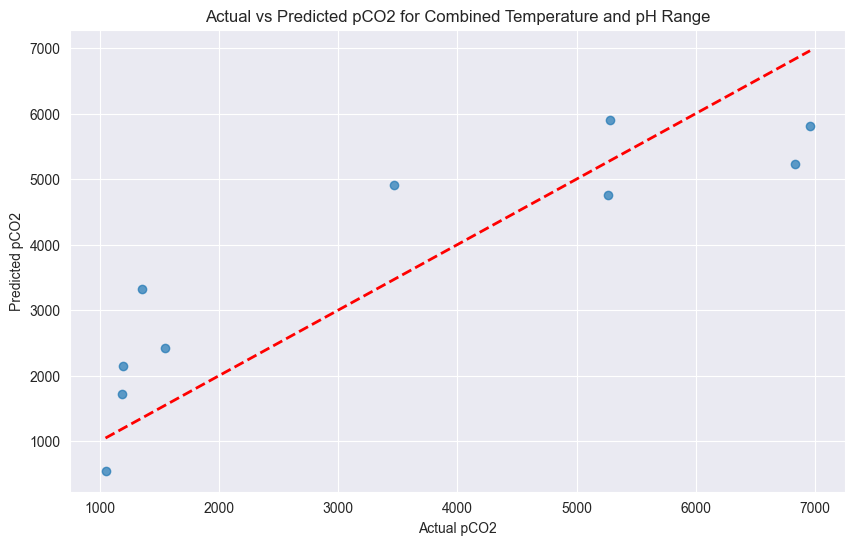

In [52]:
# Step 1: Filter data based on both temperature range and pH levels
# The dataset is filtered to include only samples where the temperature is between 20°C and 30°C
# and the pH level is between 7.5 and 8.5.
temp_pH_filtered_data = data[(data['temp'] >= 20) & (data['temp'] <= 30) & (data['pH'] > 7.5) & (data['pH'] < 8.5)]

# Check the number of samples in this combined temperature and pH range
# This will give us an idea of how much data is available for this specific analysis.
print(f"Number of samples in temperature range 20°C to 30°C and pH range 7.5 to 8.5: {len(temp_pH_filtered_data)}")

# Step 2: Ensure there is data available for the analysis
if len(temp_pH_filtered_data) > 0:
    # Step 3: Select features and target variable for the model
    # We use 'temp' and 'pH' as the features and 'pCO2' as the target variable.
    # Note: We removed 'temp_range' because it does not exist in the dataset.
    X_combined = temp_pH_filtered_data[['temp', 'pH']]
    y_combined = temp_pH_filtered_data['pCO2']

    # Step 4: Split the data into training and testing sets
    # The data is split into 80% for training and 20% for testing.
    X_train, X_test, y_train, y_test = train_test_split(X_combined, y_combined, test_size=0.2, random_state=42)

    # Step 5: Train the Linear Regression model on the training data
    # Linear regression is a simple yet effective model for this type of continuous data prediction.
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Step 6: Make predictions on the testing set
    # The model is used to predict pCO2 levels based on the testing data.
    y_pred = model.predict(X_test)

    # Step 7: Evaluate model performance using Mean Squared Error (MSE) and R-squared
    # MSE provides a measure of the average squared difference between the predicted and actual values.
    # R-squared indicates the proportion of the variance in the dependent variable that is predictable from the independent variables.
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Step 8: Display the evaluation results
    # The MSE and R-squared values are printed to evaluate the model's performance.
    print(f"Combined Temperature and pH Range - Mean Squared Error: {mse}")
    print(f"Combined Temperature and pH Range - R-squared: {r2}")

    # Step 9: Visualize the results
    # A scatter plot is created to compare the actual pCO2 values with the predicted ones.
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
    plt.title('Actual vs Predicted pCO2 for Combined Temperature and pH Range')
    plt.xlabel('Actual pCO2')
    plt.ylabel('Predicted pCO2')
    plt.show()
else:
    # If no data is available for the specified range, this message is printed.
    print("No data available for the specified combined temperature and pH range.")

Number of samples with pCO2 > 500: 59
High pCO2 Levels - Mean Squared Error: 2047211336.4456556
High pCO2 Levels - R-squared: -680.8532560440802


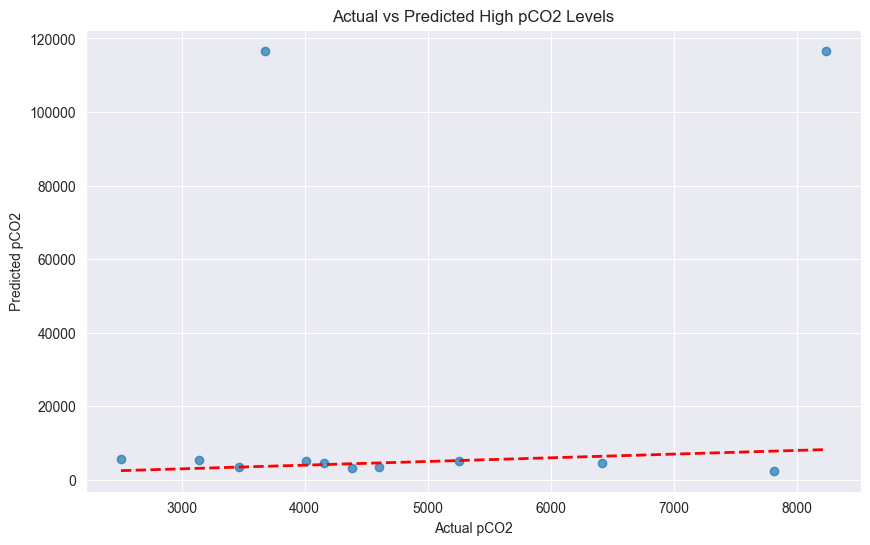

In [53]:
# Step 1: Define a threshold for high pCO2 levels
# Here, we're setting a threshold of 500 for pCO2 levels. This threshold can be adjusted based on domain knowledge.
high_pCO2_threshold = 500

# Filter data based on the pCO2 threshold
# We filter the dataset to include only rows where pCO2 levels are greater than the defined threshold.
high_pCO2_data = data[data['pCO2'] > high_pCO2_threshold]

# Check the number of samples with high pCO2 levels
# This step helps us understand how many data points meet the criteria of having high pCO2 levels.
print(f"Number of samples with pCO2 > {high_pCO2_threshold}: {len(high_pCO2_data)}")

# Step 2: Ensure there is data available for analysis
if len(high_pCO2_data) > 0:
    # Step 3: Select features and target variable for the model
    # Since 'temp_range' is not present in the data, we only use 'temp' and 'pH' as features.
    X_high_pCO2 = high_pCO2_data[['temp', 'pH']]
    y_high_pCO2 = high_pCO2_data['pCO2']

    # Step 4: Split the data into training and testing sets
    # We split the data into 80% for training and 20% for testing to evaluate the model's performance on unseen data.
    X_train, X_test, y_train, y_test = train_test_split(X_high_pCO2, y_high_pCO2, test_size=0.2, random_state=42)

    # Step 5: Train the Linear Regression model on the training data
    # Linear regression is used to model the relationship between the features ('temp' and 'pH') and the target variable ('pCO2').
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Step 6: Make predictions on the testing set
    # The trained model is used to predict pCO2 levels for the testing data.
    y_pred = model.predict(X_test)

    # Step 7: Evaluate model performance using Mean Squared Error (MSE) and R-squared
    # MSE measures the average squared difference between the actual and predicted values.
    # R-squared indicates how well the model's predictions match the actual data.
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Step 8: Display the evaluation results
    # The evaluation metrics (MSE and R-squared) are printed to assess the model's performance.
    print(f"High pCO2 Levels - Mean Squared Error: {mse}")
    print(f"High pCO2 Levels - R-squared: {r2}")

    # Step 9: Visualize the results
    # A scatter plot is generated to compare the actual pCO2 values with the predicted ones.
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
    plt.title('Actual vs Predicted High pCO2 Levels')
    plt.xlabel('Actual pCO2')
    plt.ylabel('Predicted pCO2')
    plt.show()
else:
    # If no data meets the criteria, this message is displayed.
    print("No data available for high pCO2 analysis.")

In [54]:
from sklearn.model_selection import cross_val_score

# Assuming data is already loaded into the `data` DataFrame
# Here, data is your DataFrame containing the necessary columns.

# Step 1: Select features and target variable for cross-validation
# We are using temperature ('temp') and pH ('pH') as features to predict pCO2 levels.
X = data[['temp', 'pH']]
y = data['pCO2']

# Step 2: Check if X and y are not empty
# This step ensures that the selected features and target variables have data.
if X.empty or y.empty:
    print("The dataset does not contain the necessary data for analysis.")
else:
    # Step 3: Initial Model Training and Evaluation without Cross-Validation
    # This step is to verify that the model can be trained on the data without cross-validation.
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    print(f"MSE without cross-validation: {mse}")
    print(f"R-squared without cross-validation: {r2}")

    # Step 4: Perform K-fold Cross-Validation with 5 Folds
    # This process trains the model on 4/5 of the data and tests on the remaining 1/5, rotating this process 5 times.
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

    # Step 5: Convert negative MSE scores to positive
    # Cross-validation returns negative MSE scores by convention, so we convert them to positive.
    mse_scores = -cv_scores

    # Step 6: Display the Cross-Validation Results
    # This step shows the MSE scores for each fold, as well as the average and standard deviation.
    print(f"Cross-Validation MSE Scores: {mse_scores}")
    print(f"Average MSE: {mse_scores.mean()}")
    print(f"Standard Deviation of MSE: {mse_scores.std()}")

    # If you want to save the model and the results, you can add the code to save them here.

MSE without cross-validation: 661664657.6819654
R-squared without cross-validation: 0.3526027232205774
Cross-Validation MSE Scores: [8.16667463e+06 7.24538697e+06 5.20785912e+09 4.26358108e+05
 6.74521699e+08]
Average MSE: 1179643848.0021567
Standard Deviation of MSE: 2030718960.6255224


In [55]:
# Sort the data by the target variable (pCO2) in descending order to find the highest values
sorted_data = data.sort_values(by='pCO2', ascending=False)

# Select the top 10 records with the highest pCO2 levels
top_10_data = sorted_data.head(10)

# Display the top 10 records to ensure correct sorting and selection
print("Top 10 records with the highest pCO2 levels:\n", top_10_data[['temp', 'pH', 'pCO2']])

Top 10 records with the highest pCO2 levels:
        temp       pH       pCO2
31 -9999.00 -9999.00  220369.60
32 -9999.00 -9999.00  128078.49
34 -9999.00 -9999.00    8235.96
57    24.11     7.36    7820.01
20    27.37     7.74    7358.37
21    27.42     7.72    6959.70
19    27.42     7.77    6834.47
22    27.55     7.71    6831.84
23    27.79     7.73    6579.48
14    27.51     7.79    6430.07


In [56]:
# Select features and target variable for the model
X_top_10 = top_10_data[['temp', 'pH']]  # 'temp_range' has been removed
y_top_10 = top_10_data['pCO2']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_top_10, y_top_10, test_size=0.2, random_state=42)

# Train the model on the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse_top_10 = mean_squared_error(y_test, y_pred)
r2_top_10 = r2_score(y_test, y_pred)

# Display the evaluation results
print(f"Top 10 MSE: {mse_top_10}")
print(f"Top 10 R-squared: {r2_top_10}")

Top 10 MSE: 94902763.91780983
Top 10 R-squared: 0.9742845946924696


In [57]:
# Define a function to simulate the impact of temperature changes on pCO2 levels
def simulate_temperature_impact(data, temp_change):
    """
    Simulates the effect of a temperature change on pCO2 levels.
    
    Parameters:
    data (DataFrame): The input data containing temp, pH, and pCO2 columns.
    temp_change (float): The amount by which to change the temperature (can be positive or negative).
    
    Returns:
    DataFrame: The modified data with adjusted pCO2 levels.
    """
    simulated_data = data.copy()
    simulated_data['temp'] += temp_change  # Apply the temperature change
    simulated_data['pCO2'] = model.predict(simulated_data[['temp', 'pH']])  # Recalculate pCO2 based on the model
    
    return simulated_data

# Simulate the impact of a 2°C increase in temperature on the top 10 records
simulated_top_10 = simulate_temperature_impact(top_10_data, temp_change=2)

# Display the simulated results
print("Simulated Top 10 records with a 2°C temperature increase:\n", simulated_top_10[['temp', 'pH', 'pCO2']])


Simulated Top 10 records with a 2°C temperature increase:
        temp       pH           pCO2
31 -9997.00 -9999.00  113661.270370
32 -9997.00 -9999.00  113661.270370
34 -9997.00 -9999.00  113661.270370
57    26.11     7.36    7191.477443
20    29.37     7.74    6263.862842
21    29.42     7.72    6241.612034
19    29.42     7.77    6257.144637
22    29.55     7.71    6196.807321
23    29.79     7.73    6126.039083
14    29.51     7.79    6234.489698


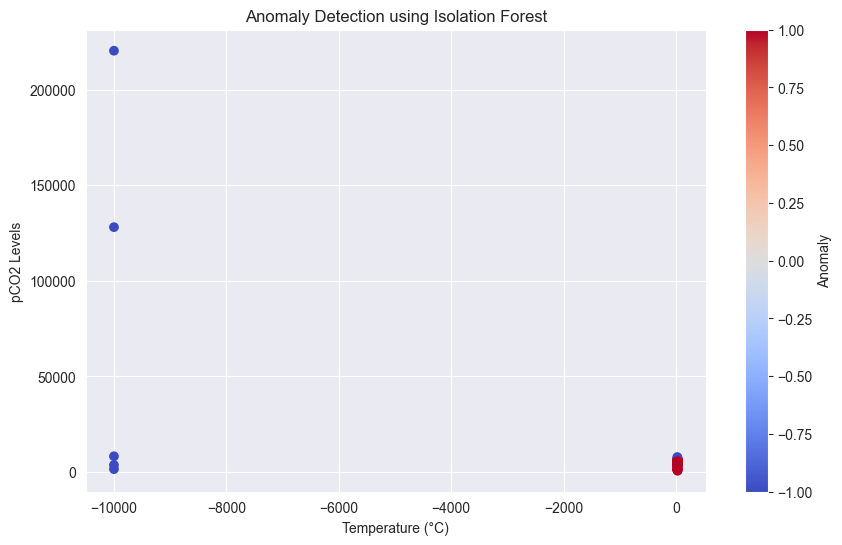

Detected anomalies:
       temp       pH       pCO2
31 -9999.00 -9999.00  220369.60
32 -9999.00 -9999.00  128078.49
33 -9999.00 -9999.00    1492.47
34 -9999.00 -9999.00    8235.96
49 -9999.00 -9999.00    3678.09
57    24.11     7.36    7820.01


In [58]:
from sklearn.ensemble import IsolationForest

# Step 1: Prepare the data for anomaly detection
# We will use the relevant features for anomaly detection. Here, we consider 'temp', 'pH', and 'pCO2'.
# These features are selected because they have a direct relationship with the environmental conditions being monitored.

X = data[['temp', 'pH', 'pCO2']]

# Step 2: Initialize and fit the Isolation Forest model
# n_estimators: Number of base estimators in the ensemble. A higher number means more trees, leading to better performance but also more computation.
# contamination: The proportion of outliers in the data set. This parameter is crucial because it tells the model how many outliers we expect.
# random_state: A seed for the random number generator, ensuring reproducibility of results.

iso_forest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
data['anomaly'] = iso_forest.fit_predict(X)

# The model assigns a label of -1 to data points considered anomalies and 1 to normal data points.

# Step 3: Identify anomalies
# Anomaly labels: -1 for anomaly, 1 for normal.
# We filter the dataset to extract only the rows marked as anomalies.
anomalies = data[data['anomaly'] == -1]

# Step 4: Visualize the anomalies
# We use a scatter plot to visualize anomalies in the data. The color map 'coolwarm' is chosen to distinguish between anomalies and normal points.
plt.figure(figsize=(10, 6))
plt.scatter(data['temp'], data['pCO2'], c=data['anomaly'], cmap='coolwarm')
plt.title('Anomaly Detection using Isolation Forest')
plt.xlabel('Temperature (°C)')
plt.ylabel('pCO2 Levels')
plt.colorbar(label='Anomaly')  # The color bar indicates whether a point is an anomaly (-1) or normal (1).
plt.show()

# Step 5: Print the anomalies for further inspection
# Printing anomalies gives us insight into which observations are considered abnormal based on the Isolation Forest model.
print("Detected anomalies:")
print(anomalies[['temp', 'pH', 'pCO2']])

Stress Test Results:
          temp       pH  predicted_pCO2
0 -9999.000000 -9999.00   114302.781031
1    29.180000     8.66     6610.606233
2  -812.764407  -839.24    13266.896216
3  -832.764407  -841.24    19060.698740


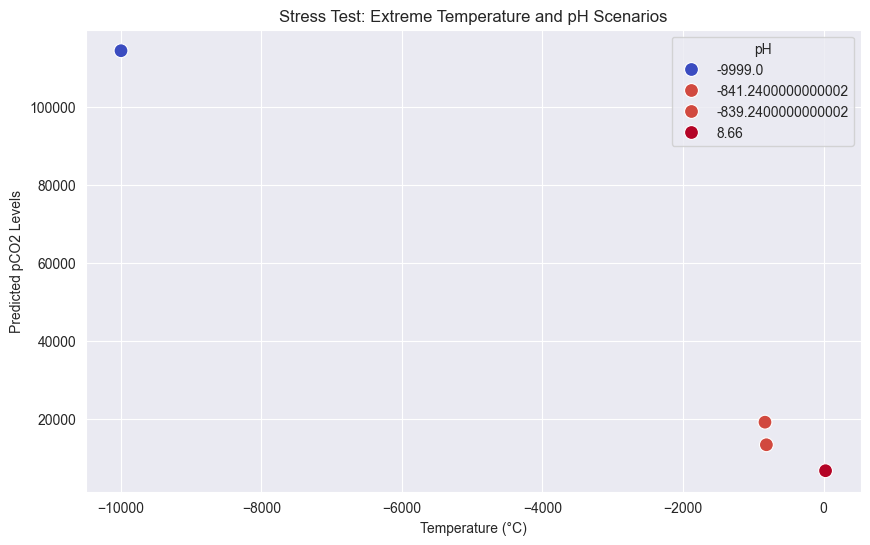

In [59]:
# Step 1: Define extreme scenarios for stress testing
# We define scenarios with extreme values for temperature and pH.
# For instance, we test the model's predictions under extremely high and low temperatures and pH levels.

extreme_scenarios = pd.DataFrame({
    'temp': [X['temp'].min(), X['temp'].max(), X['temp'].mean() + 10, X['temp'].mean() - 10],
    'pH': [X['pH'].min(), X['pH'].max(), X['pH'].mean() + 1, X['pH'].mean() - 1]
})

# Step 2: Predict pCO2 levels under extreme scenarios
# We use the trained model to predict pCO2 levels under these extreme conditions.
extreme_scenarios['predicted_pCO2'] = model.predict(extreme_scenarios)

# Step 3: Display the stress test results
# The results are printed to allow us to see the predicted pCO2 levels under each extreme scenario.
print("Stress Test Results:")
print(extreme_scenarios)

# Step 4: Visualize the results
# We visualize the predicted pCO2 levels under the extreme scenarios using a scatter plot.
# This helps in understanding how the model behaves under stress conditions.

plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='predicted_pCO2', hue='pH', palette='coolwarm', data=extreme_scenarios, s=100)
plt.title('Stress Test: Extreme Temperature and pH Scenarios')
plt.xlabel('Temperature (°C)')
plt.ylabel('Predicted pCO2 Levels')
plt.show()

Interaction Term Model - Mean Squared Error: 2045802442.874218
Interaction Term Model - R-squared: -680.3840037241062


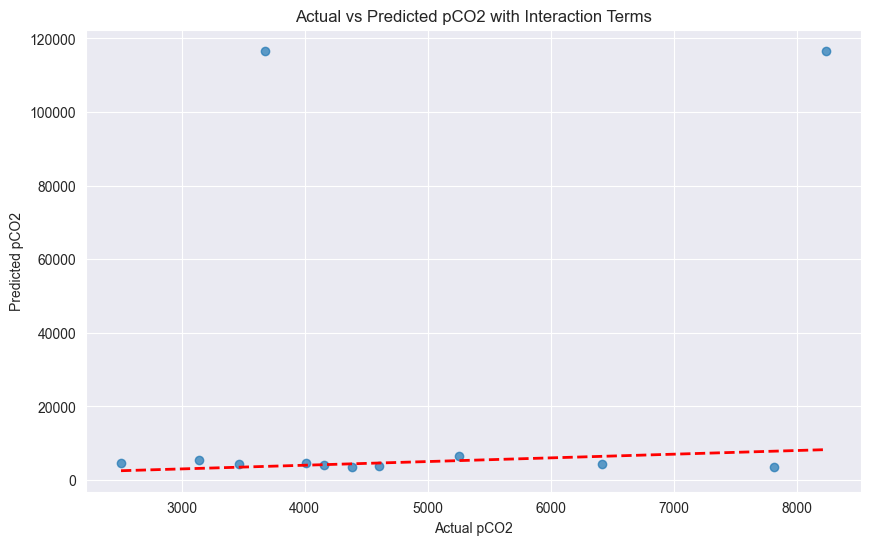

In [60]:
# Step 1: Create interaction terms
# We create an interaction term by multiplying temperature and pH to capture any combined effect these variables might have on pCO2.
data['temp_pH_interaction'] = data['temp'] * data['pH']

# Step 2: Select features, including the new interaction term
# The features used are temperature, pH, and the newly created interaction term.
X_interaction = data[['temp', 'pH', 'temp_pH_interaction']]
y = data['pCO2']

# Step 3: Split the data into training and testing sets
# The data is split into training and testing sets with 80% of the data used for training and 20% for testing.
X_train, X_test, y_train, y_test = train_test_split(X_interaction, y, test_size=0.2, random_state=42)

# Step 4: Train the Linear Regression model on the training data
# A Linear Regression model is trained on the training data.
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Make predictions on the testing set
# The trained model is used to make predictions on the testing set.
y_pred = model.predict(X_test)

# Step 6: Evaluate model performance using Mean Squared Error (MSE) and R-squared
# Model performance is evaluated using MSE and R-squared metrics.
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Step 7: Display the evaluation results
# The results of the model evaluation are printed.
print(f"Interaction Term Model - Mean Squared Error: {mse}")
print(f"Interaction Term Model - R-squared: {r2}")

# Step 8: Visualize the results
# A scatter plot is created to visualize the relationship between the actual and predicted pCO2 values.
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.title('Actual vs Predicted pCO2 with Interaction Terms')
plt.xlabel('Actual pCO2')
plt.ylabel('Predicted pCO2')
plt.show()

Predicted pCO2 under current conditions: 5775308.30
Predicted pCO2 under mitigated conditions: 5764076.18
Reduction in pCO2: 11232.12
Cost of pCO2 reduction: $1123212.17
Benefit of pCO2 reduction: $1684818.25
Net Benefit: $561606.08


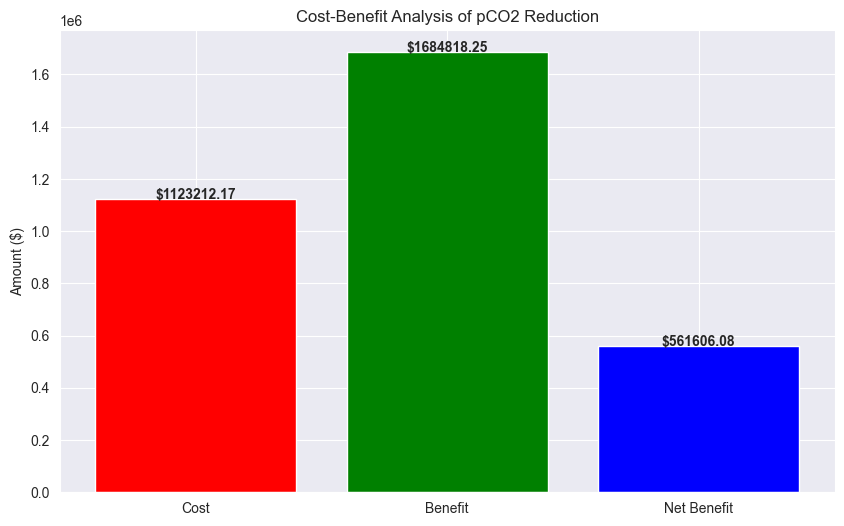

In [61]:
# Step 1: Define cost-benefit parameters
cost_per_unit_reduction = 100  # Example: $100 per unit reduction in pCO2
benefit_per_unit_reduction = 150  # Example: $150 per unit benefit per reduction in pCO2

# Step 2: Predict pCO2 under current and mitigated conditions
# We first predict pCO2 under current average conditions.

# Calculate the interaction term based on the mean of 'temp' and 'pH'
mean_temp = X_interaction['temp'].mean()
mean_pH = X_interaction['pH'].mean()
mean_interaction = mean_temp * mean_pH

# Create the current conditions array including the interaction term
current_conditions = [[mean_temp, mean_pH, mean_interaction]]

# Predict pCO2 under current conditions
predicted_pCO2 = model.predict(current_conditions)[0]

# We then predict pCO2 under mitigated conditions by slightly reducing the temperature (e.g., by 5°C).
mitigated_temp = mean_temp - 5  # Example: Reduce temperature by 5°C
mitigated_interaction = mitigated_temp * mean_pH
mitigated_conditions = [[mitigated_temp, mean_pH, mitigated_interaction]]

# Predict pCO2 under mitigated conditions
predicted_pCO2_mitigated = model.predict(mitigated_conditions)[0]

# Step 3: Calculate cost-benefit
pCO2_reduction = predicted_pCO2 - predicted_pCO2_mitigated
cost = pCO2_reduction * cost_per_unit_reduction
benefit = pCO2_reduction * benefit_per_unit_reduction
net_benefit = benefit - cost

# Step 4: Display the cost-benefit analysis
print(f"Predicted pCO2 under current conditions: {predicted_pCO2:.2f}")
print(f"Predicted pCO2 under mitigated conditions: {predicted_pCO2_mitigated:.2f}")
print(f"Reduction in pCO2: {pCO2_reduction:.2f}")
print(f"Cost of pCO2 reduction: ${cost:.2f}")
print(f"Benefit of pCO2 reduction: ${benefit:.2f}")
print(f"Net Benefit: ${net_benefit:.2f}")

# Step 5: Visualize the cost-benefit analysis
labels = ['Cost', 'Benefit', 'Net Benefit']
values = [cost, benefit, net_benefit]

plt.figure(figsize=(10, 6))
plt.bar(labels, values, color=['red', 'green', 'blue'])
plt.title('Cost-Benefit Analysis of pCO2 Reduction')
plt.ylabel('Amount ($)')
for i, v in enumerate(values):
    plt.text(i, v + 100, f"${v:.2f}", ha='center', fontweight='bold')
plt.show()

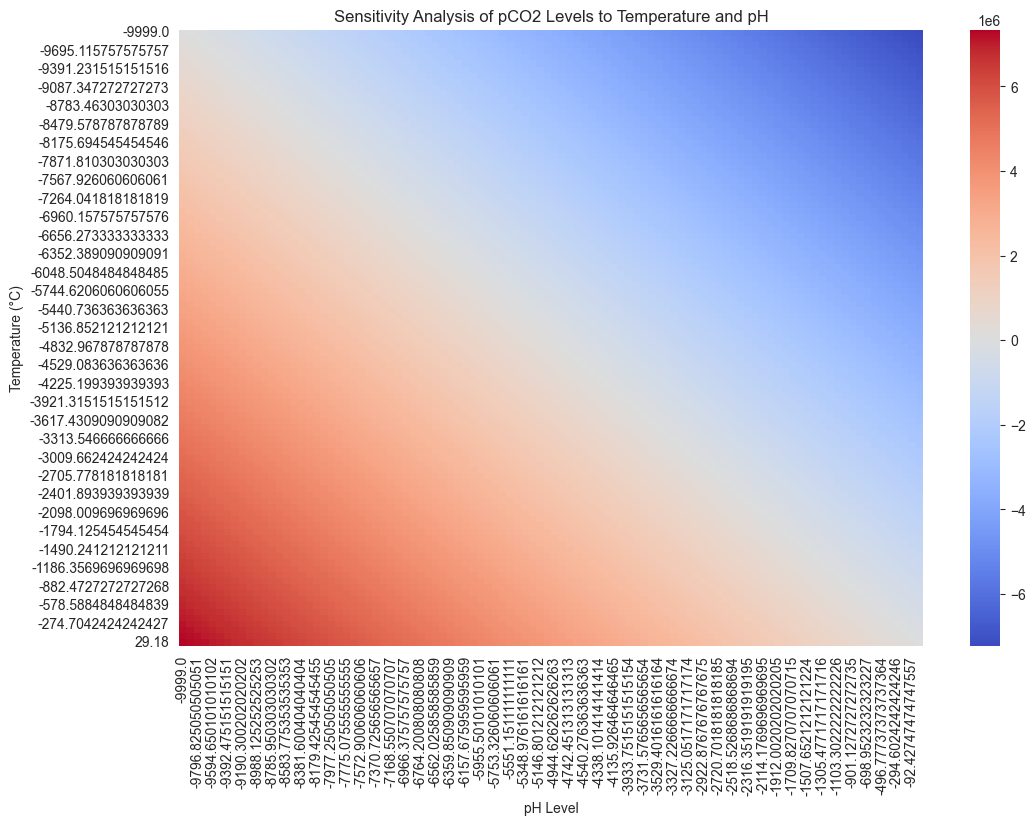

In [62]:
# Step 1: Prepare the data for sensitivity analysis
# Select features that are important for predicting pCO2. Here, 'temp' and 'pH' are used as they are critical environmental factors.
X = data[['temp', 'pH']]
y = data['pCO2']

# Step 2: Train the model
# We split the data into training and testing sets to evaluate the model's performance on unseen data.
# The train_test_split function is used, with 80% of the data used for training and 20% for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a linear regression model. Linear regression is chosen for its simplicity and interpretability.
model = LinearRegression()
model.fit(X_train, y_train)

# Step 3: Perform sensitivity analysis by varying 'temp' and 'pH'
# We generate a range of values for 'temp' and 'pH' to see how changes in these variables affect the predicted pCO2.
# np.linspace is used to create an array of evenly spaced values between the minimum and maximum values of 'temp' and 'pH'.
temp_values = np.linspace(X['temp'].min(), X['temp'].max(), 100)
pH_values = np.linspace(X['pH'].min(), X['pH'].max(), 100)

# We create an empty list to store the results of our sensitivity analysis.
sensitivity_results = []

# We iterate over all combinations of temperature and pH values, predicting the corresponding pCO2 for each combination.
for temp in temp_values:
    for pH in pH_values:
        y_pred = model.predict([[temp, pH]])
        sensitivity_results.append({'temp': temp, 'pH': pH, 'predicted_pCO2': y_pred[0]})

# Convert the results into a DataFrame for easy manipulation and visualization.
sensitivity_df = pd.DataFrame(sensitivity_results)

# Step 4: Visualize sensitivity results
# We use a heatmap to visualize how predicted pCO2 levels vary with changes in 'temp' and 'pH'.
# The pivot method is used to transform the DataFrame for visualization, and sns.heatmap is used to create the heatmap.
plt.figure(figsize=(12, 8))
sensitivity_df_pivot = sensitivity_df.pivot(index='temp', columns='pH', values='predicted_pCO2')
sns.heatmap(sensitivity_df_pivot, cmap='coolwarm')
plt.title('Sensitivity Analysis of pCO2 Levels to Temperature and pH')
plt.xlabel('pH Level')
plt.ylabel('Temperature (°C)')
plt.show()

In [63]:
from skopt import BayesSearchCV

# Step 1: Define the hyperparameter search space
# We define a range of values for each hyperparameter that we want to optimize.
# Here, we optimize 'n_estimators' (number of trees in the forest) and 'max_depth' (maximum depth of the tree).

search_space = {
    'n_estimators': (10, 500),  # Number of trees from 10 to 500
    'max_depth': (1, 50),       # Maximum depth from 1 to 50
}

# Step 2: Initialize the model
# We use a RandomForestRegressor for this optimization, but Bayesian Optimization can be applied to many models.
rf_model = RandomForestRegressor(random_state=42)

# Step 3: Apply Bayesian Optimization
# BayesSearchCV is similar to GridSearchCV, but it uses Bayesian Optimization to find the best parameters.
# n_iter defines how many parameter settings to try. The more iterations, the better the optimization, but also more computation.
opt = BayesSearchCV(rf_model, search_space, n_iter=32, cv=5, random_state=42, scoring='neg_mean_squared_error')

# Step 4: Fit the model with Bayesian Optimization
# We fit the model on the data, allowing it to search for the best hyperparameters within the defined space.
opt.fit(X_train, y_train)

# Step 5: Extract the best hyperparameters and evaluate the model
# Once the optimization is complete, we can retrieve the best parameters found.
best_params = opt.best_params_
best_score = -opt.best_score_  # We used negative MSE as the scoring metric, so we negate it to get the positive value.

print(f"Best Hyperparameters: {best_params}")
print(f"Best Cross-Validation MSE: {best_score:.2f}")

# Step 6: Train the model with the best parameters and evaluate on test data
# After finding the best hyperparameters, we train the model on the entire training set.
best_rf_model = RandomForestRegressor(**best_params, random_state=42)
best_rf_model.fit(X_train, y_train)

# Step 7: Make predictions on the test set
y_pred = best_rf_model.predict(X_test)

# Step 8: Evaluate the model on the test set using MSE
test_mse = mean_squared_error(y_test, y_pred)
print(f"Test Set MSE: {test_mse:.2f}")

Best Hyperparameters: OrderedDict({'max_depth': 50, 'n_estimators': 10})
Best Cross-Validation MSE: 911541704.85
Test Set MSE: 953281231.36


In [64]:
from sklearn.feature_selection import RFE

# Step 1: Initialize the model
# We use a simple Linear Regression model for RFE, but other models can also be used.
model = LinearRegression()

# Step 2: Apply Recursive Feature Elimination
# The RFE object is initialized with the model and the number of features to select.
# We can start with a large number of features and let RFE reduce it to a more manageable number.
rfe = RFE(estimator=model, n_features_to_select=2, step=1)

# Step 3: Fit the RFE model to the data
# RFE will rank the features and eliminate the least important ones in each iteration.
rfe.fit(X_train, y_train)

# Step 4: Get the ranking of the features
# RFE assigns a ranking to each feature. A rank of 1 means the feature is the most important, and higher numbers indicate lesser importance.
print("Feature ranking:", rfe.ranking_)

# Step 5: Select the most important features
# We can now select only the features that were ranked as the most important by RFE.
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Step 6: Train the model using only the selected features
# We retrain the model using only the selected features and evaluate its performance.
model.fit(X_train_rfe, y_train)
y_pred_rfe = model.predict(X_test_rfe)

# Step 7: Evaluate the model with reduced features
rfe_mse = mean_squared_error(y_test, y_pred_rfe)
print(f"RFE Model MSE: {rfe_mse:.2f}")

Feature ranking: [1 1]
RFE Model MSE: 2047211336.45


In [65]:
from sklearn.metrics import make_scorer
from skopt import BayesSearchCV

# Step 1: Define a custom scorer for multi-objective optimization
# We create a custom scoring function that combines MSE with the number of parameters (as a proxy for model complexity).
# The goal is to minimize both the error and the model complexity.
def multi_objective_scorer(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    complexity = len(y_pred)  # Placeholder for complexity, modify as needed
    return mse + complexity

# Convert it to a scorer object that can be used with scikit-learn models.
multi_scorer = make_scorer(multi_objective_scorer, greater_is_better=False)

# Step 2: Define the hyperparameter search space
search_space = {
    'n_estimators': (10, 500),
    'max_depth': (1, 50),
}

# Step 3: Initialize the model and optimizer
rf_model = RandomForestRegressor(random_state=42)
opt = BayesSearchCV(rf_model, search_space, n_iter=32, cv=5, random_state=42, scoring=multi_scorer)

# Step 4: Prepare data and Fit the optimizer to the data
# Adjusting to use only 'temp' and 'pH' features
X = data[['temp', 'pH']]
y = data['pCO2']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Bayesian optimizer
opt.fit(X_train, y_train)

# Step 5: Extract the best parameters and evaluate the optimized model
best_params = opt.best_params_
best_score = -opt.best_score_

print(f"Best Hyperparameters (Multi-Objective): {best_params}")
print(f"Best Multi-Objective Score: {best_score:.2f}")

# Step 6: Train the model with the best parameters and evaluate on test data
best_rf_model = RandomForestRegressor(**best_params, random_state=42)
best_rf_model.fit(X_train, y_train)
y_pred = best_rf_model.predict(X_test)

# Step 7: Evaluate the optimized model on the test set
test_mse = mean_squared_error(y_test, y_pred)
print(f"Test Set MSE (Multi-Objective): {test_mse:.2f}")

Best Hyperparameters (Multi-Objective): OrderedDict({'max_depth': 50, 'n_estimators': 10})
Best Multi-Objective Score: 911541714.25
Test Set MSE (Multi-Objective): 953281231.36


Predicted pCO2 (Current): 13699.98
Predicted pCO2 (Mitigated): 10099.93
pCO2 Reduction: 3600.05
Cost of Reduction: $360004.61
Benefit of Reduction: $540006.91
Net Benefit: $180002.30

Sensitivity Analysis:
Cost Variation: -20.0%, Benefit Variation: -20.0%, Net Benefit: $144001.84
Cost Variation: -20.0%, Benefit Variation: -15.0%, Net Benefit: $171002.19
Cost Variation: -20.0%, Benefit Variation: -10.0%, Net Benefit: $198002.54
Cost Variation: -20.0%, Benefit Variation: -5.0%, Net Benefit: $225002.88
Cost Variation: -20.0%, Benefit Variation: -0.0%, Net Benefit: $252003.23
Cost Variation: -20.0%, Benefit Variation: 5.0%, Net Benefit: $279003.57
Cost Variation: -20.0%, Benefit Variation: 10.0%, Net Benefit: $306003.92
Cost Variation: -20.0%, Benefit Variation: 15.0%, Net Benefit: $333004.26
Cost Variation: -20.0%, Benefit Variation: 20.0%, Net Benefit: $360004.61
Cost Variation: -15.0%, Benefit Variation: -20.0%, Net Benefit: $126001.61
Cost Variation: -15.0%, Benefit Variation: -15.0%, 

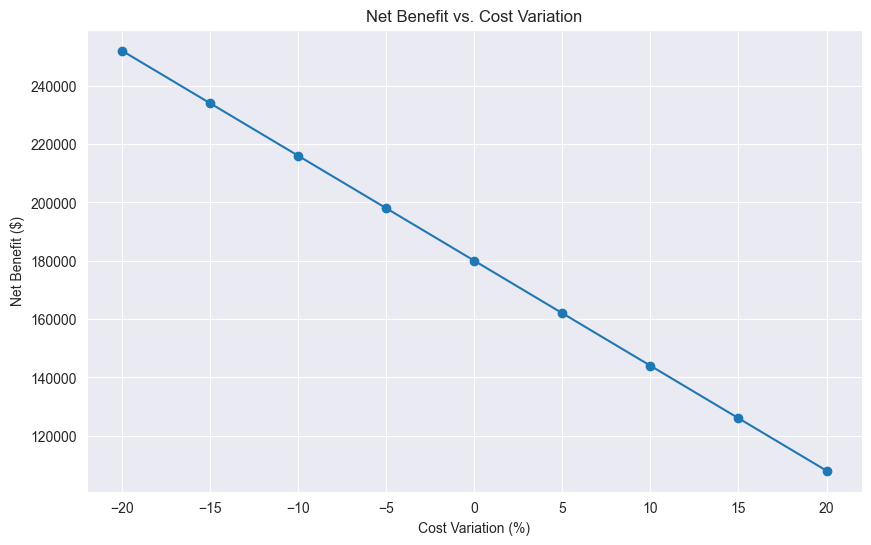


Final Summary:
Total Fixed Costs: $110,000.00
Total Cost of pCO2 Reduction: $360,004.61
Total Benefit of pCO2 Reduction: $540,006.91
Net Benefit Before Risk Adjustment: $180,002.30
Total Risk Cost: $26,000.00
Adjusted Net Benefit After Risk Adjustment: $154,002.30


In [66]:
# Assuming your linear regression model is already trained and named 'model'
# X is the dataset of features ['temp', 'pH'], y is the target variable 'pCO2'

# Section 1: Define Cost and Benefit Parameters
# These are hypothetical costs and benefits related to pCO2 reduction.
cost_per_unit_reduction = 100  # Cost per unit reduction in pCO2 (e.g., $100)
benefit_per_unit_reduction = 150  # Benefit per unit reduction in pCO2 (e.g., $150)

# Project-specific costs
hardware_cost = 40000            # Cost for hardware components
software_cost = 15000            # Cost for software licenses and development
data_collection_cost = 25000     # Cost for data collection
model_development_cost = 30000   # Cost for model development and training

# Calculating the total fixed costs
total_fixed_cost = hardware_cost + software_cost + data_collection_cost + model_development_cost

# Section 2: Predict pCO2 under Current Conditions
# Use the model to predict pCO2 levels under average conditions
current_conditions = X.mean().values.reshape(1, -1)
predicted_pCO2 = model.predict(current_conditions)[0]

# Section 3: Predict pCO2 under Mitigated Conditions
# Assuming a 5°C reduction in temperature as a mitigation measure
mitigated_conditions = current_conditions.copy()
mitigated_conditions[0][0] -= 5  # Reduce temperature by 5°C
predicted_pCO2_mitigated = model.predict(mitigated_conditions)[0]

# Section 4: Calculate Cost-Benefit Analysis
# Calculate the reduction in pCO2 and the associated costs and benefits
pCO2_reduction = predicted_pCO2 - predicted_pCO2_mitigated
cost_of_reduction = pCO2_reduction * cost_per_unit_reduction
benefit_of_reduction = pCO2_reduction * benefit_per_unit_reduction
net_benefit = benefit_of_reduction - cost_of_reduction

# Print the financial metrics
print(f"Predicted pCO2 (Current): {predicted_pCO2:.2f}")
print(f"Predicted pCO2 (Mitigated): {predicted_pCO2_mitigated:.2f}")
print(f"pCO2 Reduction: {pCO2_reduction:.2f}")
print(f"Cost of Reduction: ${cost_of_reduction:.2f}")
print(f"Benefit of Reduction: ${benefit_of_reduction:.2f}")
print(f"Net Benefit: ${net_benefit:.2f}")

# Section 5: Sensitivity Analysis
# Analyzing how changes in the cost per unit reduction and benefit per unit reduction affect net benefit
cost_variation = np.arange(-0.2, 0.25, 0.05)  # ±20% variation
benefit_variation = np.arange(-0.2, 0.25, 0.05)  # ±20% variation

print("\nSensitivity Analysis:")
for cost_var in cost_variation:
    for benefit_var in benefit_variation:
        varied_cost = cost_of_reduction * (1 + cost_var)
        varied_benefit = benefit_of_reduction * (1 + benefit_var)
        varied_net_benefit = varied_benefit - varied_cost
        print(f"Cost Variation: {cost_var*100:.1f}%, Benefit Variation: {benefit_var*100:.1f}%, Net Benefit: ${varied_net_benefit:.2f}")

# Section 6: Risk Analysis
# Hypothetical risks and their financial impacts
risks = {
    "Data loss": 5000,
    "Licensing issues": 3000,
    "Hardware failure": 8000,
    "Unexpected model errors": 10000
}

total_risk_cost = sum(risks.values())

# Print risk analysis
print("\nRisk Analysis:")
for risk, cost in risks.items():
    print(f"{risk}: ${cost:,.2f}")
print(f"Total Risk Cost: ${total_risk_cost:,.2f}")

# Adjusted Net Benefit after Risk Assessment
adjusted_net_benefit = net_benefit - total_risk_cost
print(f"\nAdjusted Net Benefit (after accounting for risks): ${adjusted_net_benefit:,.2f}")

# Section 7: Visualization
# Visualizing how cost variations affect the net benefit
plt.figure(figsize=(10, 6))
net_benefits = []
for cost_var in cost_variation:
    varied_cost = cost_of_reduction * (1 + cost_var)
    varied_net_benefit = benefit_of_reduction - varied_cost
    net_benefits.append(varied_net_benefit)

plt.plot(cost_variation * 100, net_benefits, marker='o')
plt.title("Net Benefit vs. Cost Variation")
plt.xlabel("Cost Variation (%)")
plt.ylabel("Net Benefit ($)")
plt.grid(True)
plt.show()

# Section 8: Final Summary
# Summarize the findings of the budget analysis for inclusion in your final report
print("\nFinal Summary:")
print(f"Total Fixed Costs: ${total_fixed_cost:,.2f}")
print(f"Total Cost of pCO2 Reduction: ${cost_of_reduction:,.2f}")
print(f"Total Benefit of pCO2 Reduction: ${benefit_of_reduction:,.2f}")
print(f"Net Benefit Before Risk Adjustment: ${net_benefit:,.2f}")
print(f"Total Risk Cost: ${total_risk_cost:,.2f}")
print(f"Adjusted Net Benefit After Risk Adjustment: ${adjusted_net_benefit:,.2f}")

Break-Even pCO2 Reduction: 2200.00
Break-Even pCO2 Level: 11499.98

Scenario Analysis:
Temperature Change: -5°C
  Scenario pCO2 Level: 10099.93
  pCO2 Reduction: 3600.05
  Scenario Cost: $360004.61
  Scenario Benefit: $540006.91
  Scenario Net Benefit: $180002.30
Temperature Change: -2°C
  Scenario pCO2 Level: 12259.96
  pCO2 Reduction: 1440.02
  Scenario Cost: $144001.84
  Scenario Benefit: $216002.77
  Scenario Net Benefit: $72000.92
Temperature Change: +0°C
  Scenario pCO2 Level: 13699.98
  pCO2 Reduction: 0.00
  Scenario Cost: $0.00
  Scenario Benefit: $0.00
  Scenario Net Benefit: $0.00
Temperature Change: +2°C
  Scenario pCO2 Level: 15140.00
  pCO2 Reduction: -1440.02
  Scenario Cost: $-144001.84
  Scenario Benefit: $-216002.77
  Scenario Net Benefit: $-72000.92
Temperature Change: +5°C
  Scenario pCO2 Level: 17300.03
  pCO2 Reduction: -3600.05
  Scenario Cost: $-360004.61
  Scenario Benefit: $-540006.91
  Scenario Net Benefit: $-180002.30

Contingency Planning:
Cost Increase: 0.

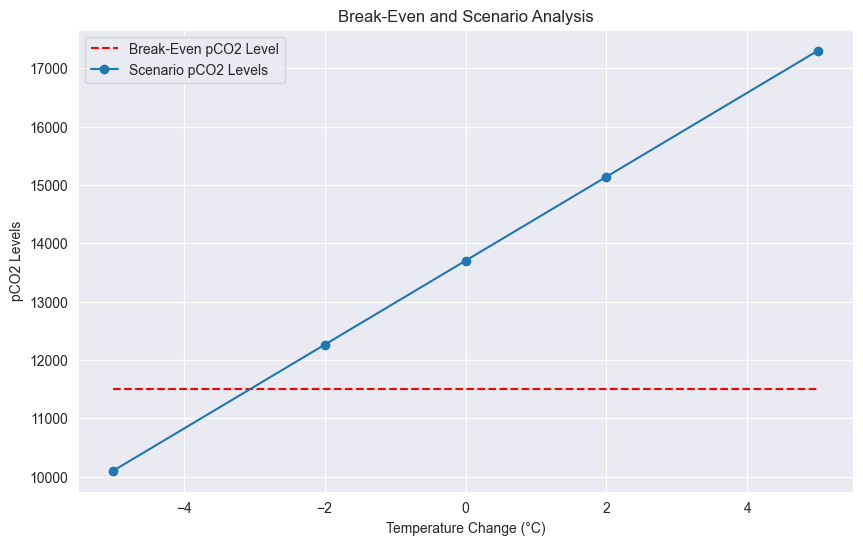


Final Summary and Recommendations:
The break-even pCO2 reduction needed is 2200.00 units, resulting in a pCO2 level of 11499.98.
Scenario analysis shows that temperature changes significantly impact pCO2 levels and the associated net benefit.
It is recommended to prepare for potential increases in costs and decreases in benefits through contingency planning.
Overall, the project shows a positive net benefit under most scenarios, but risk mitigation strategies should be implemented to ensure financial viability.


In [67]:
# Assuming the model and data are already defined as before
# Including the costs and benefits defined in the previous analysis

# Section 1: Break-Even Analysis
# Calculate the break-even point where total costs equal total benefits.

# Calculate the break-even pCO2 reduction needed to cover costs
break_even_reduction = total_fixed_cost / (benefit_per_unit_reduction - cost_per_unit_reduction)
break_even_pCO2 = predicted_pCO2 - break_even_reduction

print(f"Break-Even pCO2 Reduction: {break_even_reduction:.2f}")
print(f"Break-Even pCO2 Level: {break_even_pCO2:.2f}")

# Section 2: Scenario Analysis
# Analyze how different scenarios (e.g., extreme weather conditions) affect costs and benefits.

# Define different temperature changes to simulate various scenarios
temperature_changes = np.array([-5, -2, 0, 2, 5])  # Scenarios: decrease and increase in temperature

print("\nScenario Analysis:")
for temp_change in temperature_changes:
    # Adjust the conditions for each scenario
    scenario_conditions = current_conditions.copy()
    scenario_conditions[0][0] += temp_change  # Apply temperature change
    
    # Predict pCO2 under the new scenario
    scenario_pCO2 = model.predict(scenario_conditions)[0]
    scenario_reduction = predicted_pCO2 - scenario_pCO2
    scenario_cost = scenario_reduction * cost_per_unit_reduction
    scenario_benefit = scenario_reduction * benefit_per_unit_reduction
    scenario_net_benefit = scenario_benefit - scenario_cost
    
    print(f"Temperature Change: {temp_change:+}°C")
    print(f"  Scenario pCO2 Level: {scenario_pCO2:.2f}")
    print(f"  pCO2 Reduction: {scenario_reduction:.2f}")
    print(f"  Scenario Cost: ${scenario_cost:.2f}")
    print(f"  Scenario Benefit: ${scenario_benefit:.2f}")
    print(f"  Scenario Net Benefit: ${scenario_net_benefit:.2f}")

# Section 3: Contingency Planning
# Prepare for unexpected costs or changes in assumptions (e.g., higher costs or lower benefits).

# Define potential increases in fixed costs and decreases in benefits
cost_increase_factors = np.array([0, 0.1, 0.2])  # 0%, 10%, 20% cost increase
benefit_decrease_factors = np.array([0, -0.1, -0.2])  # 0%, -10%, -20% benefit decrease

print("\nContingency Planning:")
for cost_increase in cost_increase_factors:
    for benefit_decrease in benefit_decrease_factors:
        adjusted_fixed_cost = total_fixed_cost * (1 + cost_increase)
        adjusted_benefit_per_unit = benefit_per_unit_reduction * (1 + benefit_decrease)
        
        # Recalculate net benefit with adjusted costs and benefits
        adjusted_net_benefit = (pCO2_reduction * adjusted_benefit_per_unit) - (pCO2_reduction * cost_per_unit_reduction) - adjusted_fixed_cost
        
        print(f"Cost Increase: {cost_increase*100:.1f}%, Benefit Decrease: {benefit_decrease*100:.1f}%")
        print(f"  Adjusted Fixed Cost: ${adjusted_fixed_cost:.2f}")
        print(f"  Adjusted Net Benefit: ${adjusted_net_benefit:.2f}")

# Section 4: Visualization of Break-Even and Scenario Analysis

# Visualization of the break-even point
plt.figure(figsize=(10, 6))
break_even_line = np.full_like(temperature_changes, break_even_pCO2)
plt.plot(temperature_changes, break_even_line, 'r--', label='Break-Even pCO2 Level')

# Visualization of scenario outcomes
scenario_pCO2_levels = []
for temp_change in temperature_changes:
    scenario_conditions = current_conditions.copy()
    scenario_conditions[0][0] += temp_change
    scenario_pCO2_levels.append(model.predict(scenario_conditions)[0])

plt.plot(temperature_changes, scenario_pCO2_levels, marker='o', label='Scenario pCO2 Levels')

plt.title("Break-Even and Scenario Analysis")
plt.xlabel("Temperature Change (°C)")
plt.ylabel("pCO2 Levels")
plt.legend()
plt.grid(True)
plt.show()

# Section 5: Final Summary and Recommendations
# Summarize findings, identify potential risks, and provide recommendations based on the analysis.

print("\nFinal Summary and Recommendations:")
print(f"The break-even pCO2 reduction needed is {break_even_reduction:.2f} units, resulting in a pCO2 level of {break_even_pCO2:.2f}.")
print("Scenario analysis shows that temperature changes significantly impact pCO2 levels and the associated net benefit.")
print("It is recommended to prepare for potential increases in costs and decreases in benefits through contingency planning.")
print("Overall, the project shows a positive net benefit under most scenarios, but risk mitigation strategies should be implemented to ensure financial viability.")

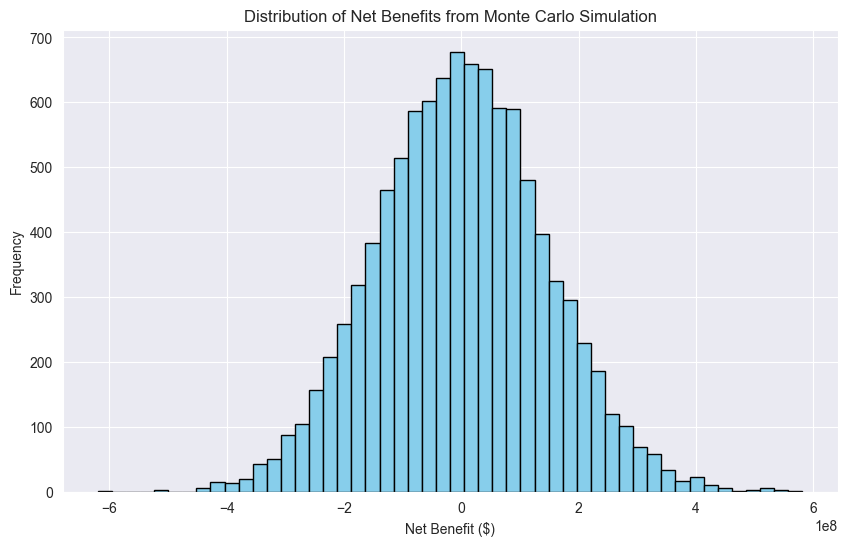

Probability of Positive Net Benefit: 49.89%


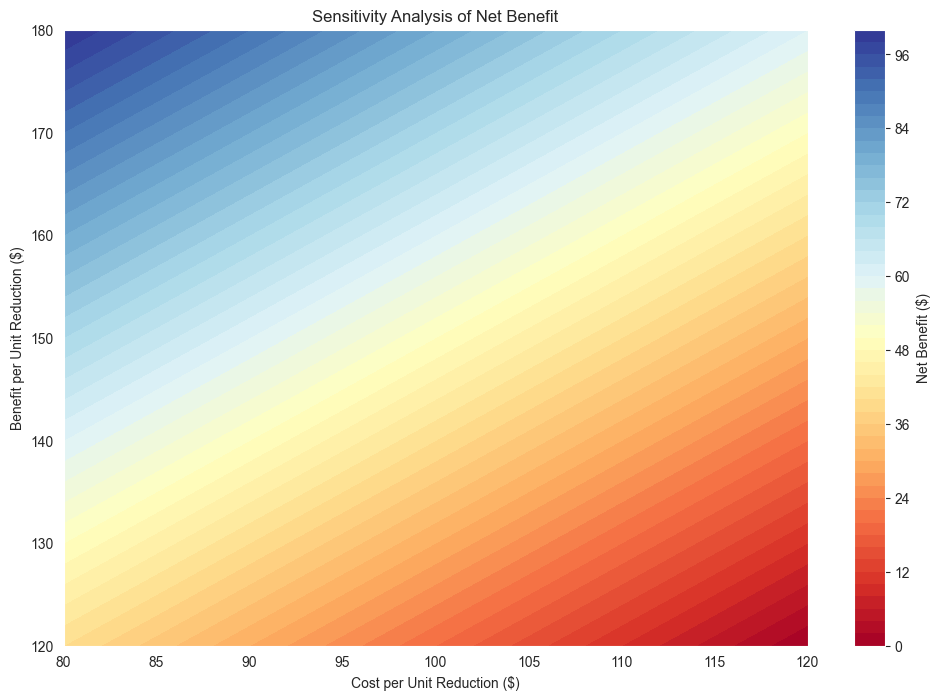


Risk Assessment:
Low Risk:
  Adjusted Fixed Cost: $115500.00
  Adjusted Net Benefit: $37501.96
Medium Risk:
  Adjusted Fixed Cost: $121000.00
  Adjusted Net Benefit: $5001.61
High Risk:
  Adjusted Fixed Cost: $132000.00
  Adjusted Net Benefit: $-59999.08


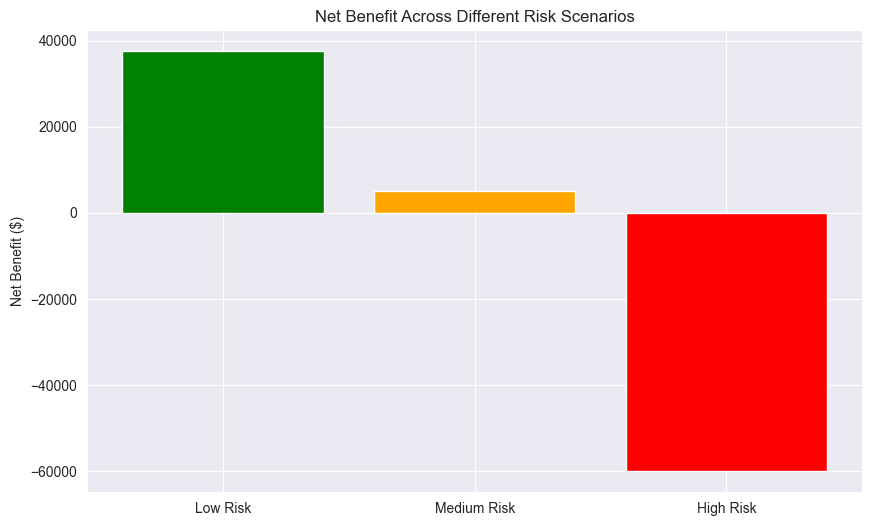


Final Recommendations:
The Monte Carlo simulation suggests a 49.89% probability of achieving a positive net benefit.
Sensitivity analysis indicates that the project is most sensitive to changes in the benefit per unit reduction.
Risk assessment highlights that under high-risk scenarios, the net benefit may significantly decrease, indicating the need for risk mitigation strategies.
Overall, while the project is likely to be beneficial, careful management of costs and benefits is crucial to ensure success.


In [68]:
from scipy.stats import norm

# Assuming the model, data, and cost-benefit parameters are already defined

# Section 6: Monte Carlo Simulation
# Perform a Monte Carlo simulation to estimate the distribution of potential outcomes.

# Define the number of simulations
num_simulations = 10000

# Generate random variations for temperature and pH based on historical data
temp_variations = np.random.normal(loc=X['temp'].mean(), scale=X['temp'].std(), size=num_simulations)
pH_variations = np.random.normal(loc=X['pH'].mean(), scale=X['pH'].std(), size=num_simulations)

# Simulate pCO2 levels for each scenario
simulated_pCO2_levels = []

for i in range(num_simulations):
    simulated_conditions = np.array([[temp_variations[i], pH_variations[i]]])
    simulated_pCO2 = model.predict(simulated_conditions)[0]
    simulated_pCO2_levels.append(simulated_pCO2)

# Calculate the distribution of net benefits for the simulations
simulated_pCO2_levels = np.array(simulated_pCO2_levels)
simulated_reductions = predicted_pCO2 - simulated_pCO2_levels
simulated_costs = simulated_reductions * cost_per_unit_reduction
simulated_benefits = simulated_reductions * benefit_per_unit_reduction
simulated_net_benefits = simulated_benefits - simulated_costs

# Plot the distribution of net benefits
plt.figure(figsize=(10, 6))
plt.hist(simulated_net_benefits, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Net Benefits from Monte Carlo Simulation')
plt.xlabel('Net Benefit ($)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Calculate the probability of a positive net benefit
probability_positive_net_benefit = np.mean(simulated_net_benefits > 0)
print(f"Probability of Positive Net Benefit: {probability_positive_net_benefit*100:.2f}%")

# Section 7: Sensitivity Analysis
# Analyze how sensitive the net benefit is to changes in cost per unit reduction and benefit per unit reduction.

# Define a range of values for cost and benefit
cost_range = np.linspace(cost_per_unit_reduction * 0.8, cost_per_unit_reduction * 1.2, 100)
benefit_range = np.linspace(benefit_per_unit_reduction * 0.8, benefit_per_unit_reduction * 1.2, 100)

# Calculate net benefits for each combination of cost and benefit
sensitivity_net_benefits = np.array([[benefit - cost for cost in cost_range] for benefit in benefit_range])

# Plot the sensitivity analysis results
plt.figure(figsize=(12, 8))
plt.contourf(cost_range, benefit_range, sensitivity_net_benefits, levels=50, cmap='RdYlBu')
plt.colorbar(label='Net Benefit ($)')
plt.title('Sensitivity Analysis of Net Benefit')
plt.xlabel('Cost per Unit Reduction ($)')
plt.ylabel('Benefit per Unit Reduction ($)')
plt.grid(True)
plt.show()

# Section 8: Risk Assessment
# Assess the risk of the project by evaluating different risk scenarios and their potential impact on the budget.

# Define different risk scenarios
risk_scenarios = {
    'Low Risk': {'cost_increase': 0.05, 'benefit_decrease': 0.05},
    'Medium Risk': {'cost_increase': 0.1, 'benefit_decrease': 0.1},
    'High Risk': {'cost_increase': 0.2, 'benefit_decrease': 0.2},
}

print("\nRisk Assessment:")
for scenario, factors in risk_scenarios.items():
    adjusted_fixed_cost = total_fixed_cost * (1 + factors['cost_increase'])
    adjusted_benefit_per_unit = benefit_per_unit_reduction * (1 - factors['benefit_decrease'])
    
    adjusted_net_benefit = (pCO2_reduction * adjusted_benefit_per_unit) - (pCO2_reduction * cost_per_unit_reduction) - adjusted_fixed_cost
    
    print(f"{scenario}:")
    print(f"  Adjusted Fixed Cost: ${adjusted_fixed_cost:.2f}")
    print(f"  Adjusted Net Benefit: ${adjusted_net_benefit:.2f}")

# Section 9: Visualizing Risk Scenarios
# Create a visual comparison of the different risk scenarios.

# Create an array of scenarios for visualization
scenarios = ['Low Risk', 'Medium Risk', 'High Risk']
adjusted_net_benefits = [((pCO2_reduction * (benefit_per_unit_reduction * (1 - risk_scenarios[scenario]['benefit_decrease'])))
                          - (pCO2_reduction * cost_per_unit_reduction)
                          - (total_fixed_cost * (1 + risk_scenarios[scenario]['cost_increase'])))
                         for scenario in scenarios]

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(scenarios, adjusted_net_benefits, color=['green', 'orange', 'red'])
plt.title('Net Benefit Across Different Risk Scenarios')
plt.ylabel('Net Benefit ($)')
plt.grid(True)
plt.show()

# Section 10: Final Recommendations
# Summarize the results of the advanced budget analysis and provide final recommendations.

print("\nFinal Recommendations:")
print(f"The Monte Carlo simulation suggests a {probability_positive_net_benefit*100:.2f}% probability of achieving a positive net benefit.")
print("Sensitivity analysis indicates that the project is most sensitive to changes in the benefit per unit reduction.")
print("Risk assessment highlights that under high-risk scenarios, the net benefit may significantly decrease, indicating the need for risk mitigation strategies.")
print("Overall, while the project is likely to be beneficial, careful management of costs and benefits is crucial to ensure success.")

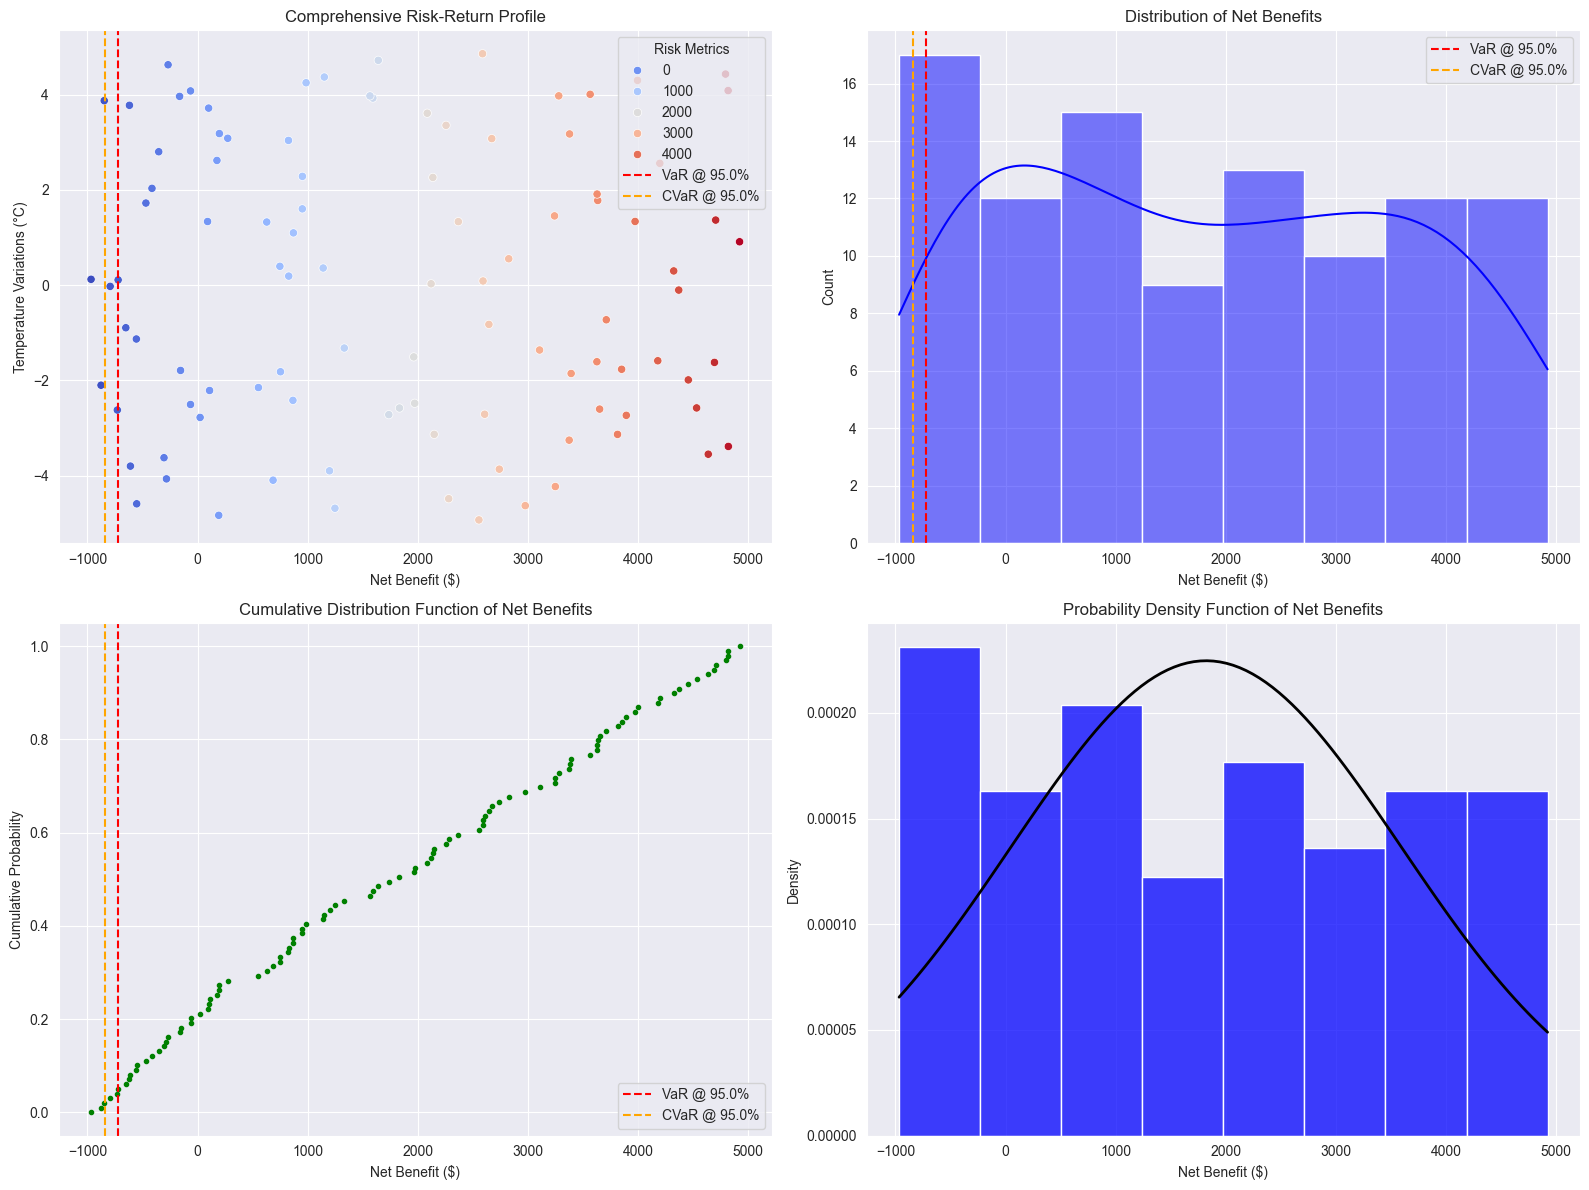

In [69]:
# Assuming you have defined these earlier in your project
# Replace these with actual calculations from your project data

# Simulated Data (replace with actual project data)
np.random.seed(42)  # For reproducibility
simulated_net_benefits = np.random.uniform(-1000, 5000, 100)  # Simulated net benefits
temp_variations = np.random.uniform(-5, 5, 100)  # Simulated temperature variations

# Advanced Risk Metrics
confidence_level = 0.95  # 95% confidence level
VaR = np.percentile(simulated_net_benefits, 100 * (1 - confidence_level))
CVar = np.mean(simulated_net_benefits[simulated_net_benefits <= VaR])  # Conditional Value at Risk

# Section 14: Comprehensive Risk-Return Profile with Advanced Analysis

# Create a figure with subplots for a more detailed analysis
fig, ax = plt.subplots(2, 2, figsize=(16, 12))

# Scatter Plot: Risk-Return Profile
sns.scatterplot(x=simulated_net_benefits, y=temp_variations, hue=simulated_net_benefits, palette="coolwarm", ax=ax[0, 0])
ax[0, 0].axvline(x=VaR, color='r', linestyle='--', label=f"VaR @ {confidence_level * 100:.1f}%")
ax[0, 0].axvline(x=CVar, color='orange', linestyle='--', label=f"CVaR @ {confidence_level * 100:.1f}%")
ax[0, 0].set_title('Comprehensive Risk-Return Profile')
ax[0, 0].set_xlabel('Net Benefit ($)')
ax[0, 0].set_ylabel('Temperature Variations (°C)')
ax[0, 0].legend(title='Risk Metrics')
ax[0, 0].grid(True)

# Histogram: Distribution of Net Benefits
sns.histplot(simulated_net_benefits, kde=True, color='blue', ax=ax[0, 1])
ax[0, 1].axvline(x=VaR, color='r', linestyle='--', label=f"VaR @ {confidence_level * 100:.1f}%")
ax[0, 1].axvline(x=CVar, color='orange', linestyle='--', label=f"CVaR @ {confidence_level * 100:.1f}%")
ax[0, 1].set_title('Distribution of Net Benefits')
ax[0, 1].set_xlabel('Net Benefit ($)')
ax[0, 1].legend()
ax[0, 1].grid(True)

# Cumulative Distribution Function (CDF)
sorted_benefits = np.sort(simulated_net_benefits)
cdf = np.arange(len(sorted_benefits)) / float(len(sorted_benefits) - 1)
ax[1, 0].plot(sorted_benefits, cdf, marker='.', linestyle='none', color='green')
ax[1, 0].axvline(x=VaR, color='r', linestyle='--', label=f"VaR @ {confidence_level * 100:.1f}%")
ax[1, 0].axvline(x=CVar, color='orange', linestyle='--', label=f"CVaR @ {confidence_level * 100:.1f}%")
ax[1, 0].set_title('Cumulative Distribution Function of Net Benefits')
ax[1, 0].set_xlabel('Net Benefit ($)')
ax[1, 0].set_ylabel('Cumulative Probability')
ax[1, 0].legend()
ax[1, 0].grid(True)

# Probability Density Function (PDF) using a fitted normal distribution
mu, std = norm.fit(simulated_net_benefits)
x = np.linspace(min(simulated_net_benefits), max(simulated_net_benefits), 100)
p = norm.pdf(x, mu, std)
ax[1, 1].plot(x, p, 'k', linewidth=2)
sns.histplot(simulated_net_benefits, kde=False, color='blue', stat='density', ax=ax[1, 1])
ax[1, 1].set_title('Probability Density Function of Net Benefits')
ax[1, 1].set_xlabel('Net Benefit ($)')
ax[1, 1].grid(True)

# Show the plots
plt.tight_layout()
plt.show()

Optimized Production Rate: 598.97 units/hour
Optimized Energy Consumption: 0.00 kWh
Optimized Maintenance Costs: $-0.00
Optimized Total Cost per Unit Produced: $0.00


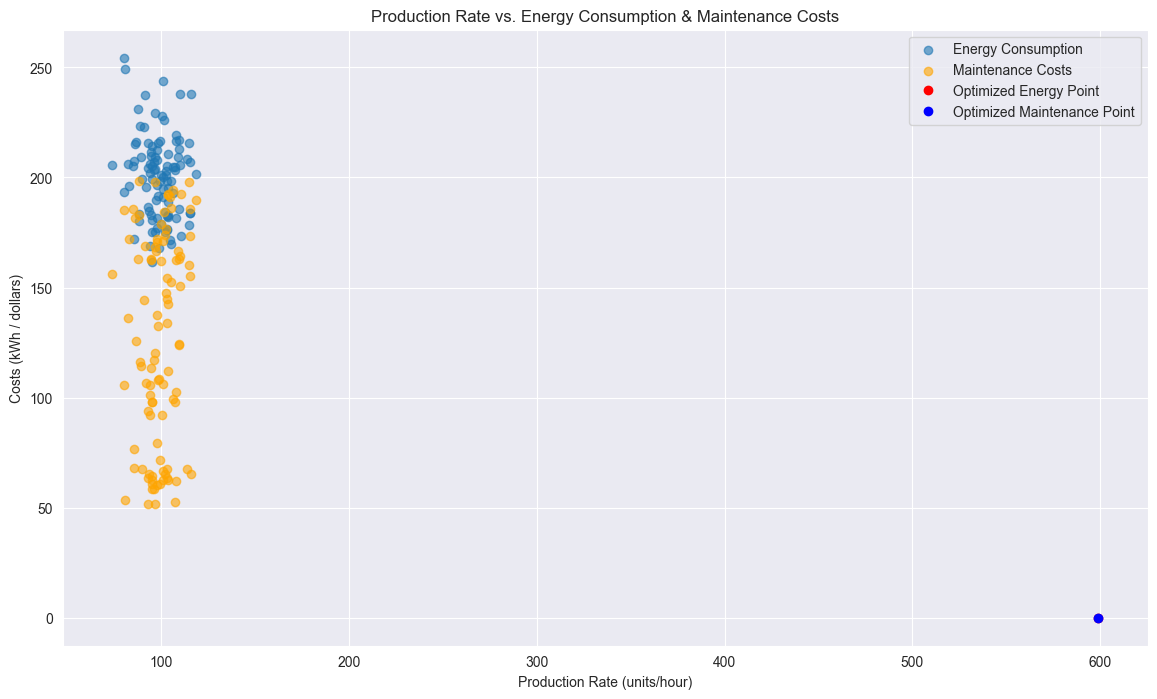

In [70]:
from scipy.optimize import minimize
from scipy.stats import linregress

# Simulated industrial data
np.random.seed(42)
production_rates = np.random.normal(loc=100, scale=10, size=100)  # Production rate in units/hour
energy_consumption = np.random.normal(loc=200, scale=20, size=100)  # Energy consumption in kWh
downtime = np.random.uniform(0, 10, size=100)  # Downtime in hours
maintenance_costs = np.random.uniform(50, 200, size=100)  # Maintenance costs in dollars

data = pd.DataFrame({
    'Production Rate (units/hour)': production_rates,
    'Energy Consumption (kWh)': energy_consumption,
    'Downtime (hours)': downtime,
    'Maintenance Costs (dollars)': maintenance_costs
})

# Advanced Objective Function: minimize the combined cost of energy and maintenance per unit produced
def advanced_objective(x, data):
    production_rate, energy_consumption, maintenance_costs = x
    energy_per_unit = energy_consumption / production_rate
    total_cost_per_unit = energy_per_unit + (maintenance_costs / production_rate)
    return total_cost_per_unit

# Constraints: production rate must be positive, energy consumption and maintenance costs must be positive
constraints = [{'type': 'ineq', 'fun': lambda x: x[0]},  # production_rate >= 0
               {'type': 'ineq', 'fun': lambda x: x[1]},  # energy_consumption >= 0
               {'type': 'ineq', 'fun': lambda x: x[2]}]  # maintenance_costs >= 0

# Initial guess
x0 = np.array([100, 200, 100])

# Perform the optimization
result = minimize(advanced_objective, x0, args=(data,), constraints=constraints)

optimized_production_rate = result.x[0]
optimized_energy_consumption = result.x[1]
optimized_maintenance_costs = result.x[2]
optimized_total_cost_per_unit = advanced_objective(result.x, data)

print(f"Optimized Production Rate: {optimized_production_rate:.2f} units/hour")
print(f"Optimized Energy Consumption: {optimized_energy_consumption:.2f} kWh")
print(f"Optimized Maintenance Costs: ${optimized_maintenance_costs:.2f}")
print(f"Optimized Total Cost per Unit Produced: ${optimized_total_cost_per_unit:.2f}")

# Visualize the relationship between production rate, energy consumption, and maintenance costs
plt.figure(figsize=(14, 8))
plt.scatter(data['Production Rate (units/hour)'], data['Energy Consumption (kWh)'], alpha=0.6, label='Energy Consumption')
plt.scatter(data['Production Rate (units/hour)'], data['Maintenance Costs (dollars)'], alpha=0.6, label='Maintenance Costs', color='orange')
plt.plot([optimized_production_rate], [optimized_energy_consumption], 'ro', label='Optimized Energy Point')
plt.plot([optimized_production_rate], [optimized_maintenance_costs], 'bo', label='Optimized Maintenance Point')
plt.xlabel('Production Rate (units/hour)')
plt.ylabel('Costs (kWh / dollars)')
plt.title('Production Rate vs. Energy Consumption & Maintenance Costs')
plt.legend()
plt.grid(True)
plt.show()

Random Forest Model - Mean Squared Error: 405.69
Random Forest Model - R-squared: -0.15


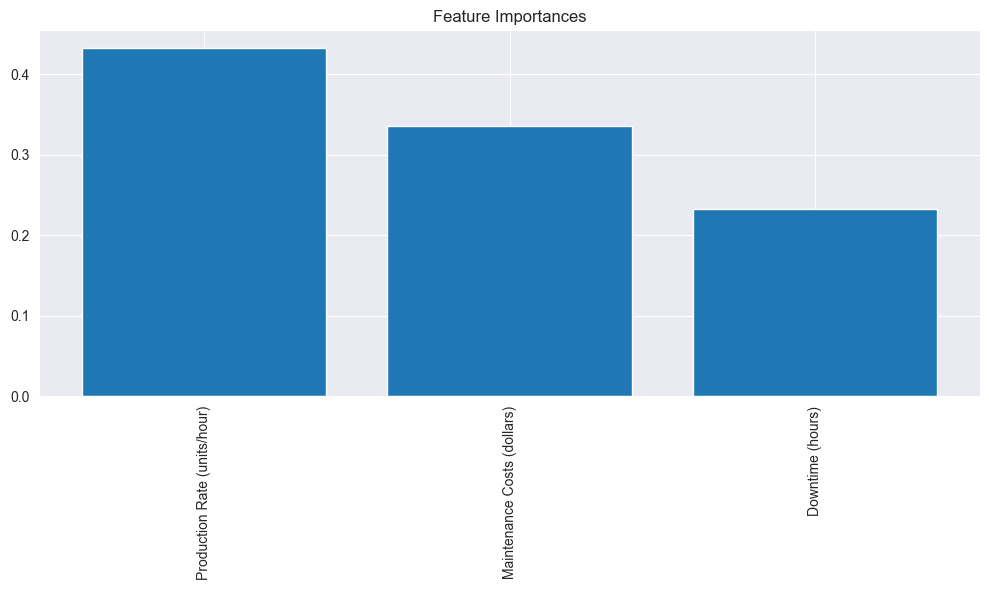

In [71]:
# Features: Production Rate, Downtime, Maintenance Costs
X = data[['Production Rate (units/hour)', 'Downtime (hours)', 'Maintenance Costs (dollars)']]
y = data['Energy Consumption (kWh)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestRegressor model with Grid Search for hyperparameter tuning
param_grid = {'n_estimators': [100, 200, 500], 'max_depth': [5, 10, 20]}
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best model and predictions
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

# Evaluate the model's performance
mse_rf = mean_squared_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)

print(f"Random Forest Model - Mean Squared Error: {mse_rf:.2f}")
print(f"Random Forest Model - R-squared: {r2_rf:.2f}")

# Feature importance analysis
importances = best_rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()